# HOUSE PRICING PROJECT

### importing libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### read the csv file

In [2]:
df = pd.read_csv("D:/ML PROJECT/training_set.csv")

In [3]:
df.head(7)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   
5   6          50       RL         85.0    14115   Pave   NaN      IR1   
6   7          20       RL         75.0    10084   Pave   NaN      Reg   

  LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
2         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
3         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
4         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
5         Lvl    AllPub  ...        0    NaN  MnPrv        Shed     700   
6         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

  MoSold YrSold  SaleType  SaleCondition  SalePrice  
0      2   2008        WD         Normal     208500  
1      5   2007        WD         Normal     181500  
2      9   2008        WD         Normal     223500  
3      2   2006        WD        Abnorml     140000  
4     12   2008        WD         Normal     250000  
5     10   2009        WD         Normal     143000  
6      8   2007        WD         Normal     307000  

[7 rows x 81 columns]

### EDA

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
df.isnull()

Id  MSSubClass  MSZoning  LotFrontage  LotArea  Street  Alley  \
0     False       False     False        False    False   False   True   
1     False       False     False        False    False   False   True   
2     False       False     False        False    False   False   True   
3     False       False     False        False    False   False   True   
4     False       False     False        False    False   False   True   
...     ...         ...       ...          ...      ...     ...    ...   
1455  False       False     False        False    False   False   True   
1456  False       False     False        False    False   False   True   
1457  False       False     False        False    False   False   True   
1458  False       False     False        False    False   False   True   
1459  False       False     False        False    False   False   True   

      LotShape  LandContour  Utilities  ...  PoolArea  PoolQC  Fence  \
0        False        False      False  ...     False    True   True   
1        False        False      False  ...     False    True   True   
2        False        False      False  ...     False    True   True   
3        False        False      False  ...     False    True   True   
4        False        False      False  ...     False    True   True   
...        ...          ...        ...  ...       ...     ...    ...   
1455     False        False      False  ...     False    True   True   
1456     False        False      False  ...     False    True  False   
1457     False        False      False  ...     False    True  False   
1458     False        False      False  ...     False    True   True   
1459     False        False      False  ...     False    True   True   

      MiscFeature  MiscVal  MoSold  YrSold  SaleType  SaleCondition  SalePrice  
0            True    False   False   False     False          False      False  
1            True    False   False   False     False          False      False  
2            True    False   False   False     False          False      False  
3            True    False   False   False     False          False      False  
4            True    False   False   False     False          False      False  
...           ...      ...     ...     ...       ...            ...        ...  
1455         True    False   False   False     False          False      False  
1456         True    False   False   False     False          False      False  
1457        False    False   False   False     False          False      False  
1458         True    False   False   False     False          False      False  
1459         True    False   False   False     False          False      False  

[1460 rows x 81 columns]

In [6]:
n=[]
for i in df.columns:
    na=df[i].value_counts()
    n.append(na)
print(n)

[Id
1       1
982     1
980     1
979     1
978     1
       ..
485     1
484     1
483     1
482     1
1460    1
Name: count, Length: 1460, dtype: int64, MSSubClass
20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: count, dtype: int64, MSZoning
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: count, dtype: int64, LotFrontage
60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
        ... 
137.0      1
141.0      1
38.0       1
140.0      1
46.0       1
Name: count, Length: 110, dtype: int64, LotArea
7200     25
9600     24
6000     17
9000     14
8400     14
         ..
14601     1
13682     1
4058      1
17104     1
9717      1
Name: count, Length: 1073, dtype: int64, Street
Pave    1454
Grvl       6
Name: count, dtype: int64, Alley
Grvl    50
Pave    41
Name: count, dtype: int64, LotShape
Reg    925
IR1    484
IR2 

In [7]:
df['Alley'].replace('NA', 'No Alley access', inplace=True)

In [8]:
df['BsmtQual'].replace('NA', 'No Basement', inplace=True)

In [9]:
df['BsmtCond'].replace('NA', 'No Basement', inplace=True)

In [10]:
df['BsmtExposure'].replace('NA', 'No Basement', inplace=True)

In [11]:
df['BsmtFinType1'].replace('NA', 'No Basement', inplace=True)

In [12]:
df['BsmtFinType2'].replace('NA', 'No Basement', inplace=True)

In [13]:
df['FireplaceQu'].replace('NA', 'No Fireplace', inplace=True)

In [14]:
df['GarageType'].replace('NA', 'No Garage', inplace=True)

In [15]:
df['GarageFinish'].replace('NA', 'No Garage', inplace=True)

In [16]:
df['GarageQual'].replace('NA', 'No Garage', inplace=True)

In [17]:
df['GarageCond'].replace('NA', 'No Garage', inplace=True)

In [18]:
df['PoolQC'].replace('NA', 'No Pool', inplace=True)

In [19]:
df['Fence'].replace('NA', 'No Fence', inplace=True)

In [20]:
df['MiscFeature'].replace('NA', 'None', inplace=True)

In [21]:
df

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
2            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
3            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
4            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
...          ...       ...  ...      ...    ...    ...         ...     ...   
1455         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1456         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1457         Lvl    AllPub  ...        0    NaN  GdPrv        Shed    2500   
1458         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1459         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
0         2   2008        WD         Normal     208500  
1         5   2007        WD         Normal     181500  
2         9   2008        WD         Normal     223500  
3         2   2006        WD        Abnorml     140000  
4        12   2008        WD         Normal     250000  
...     ...    ...       ...            ...        ...  
1455      8   2007        WD         Normal     175000  
1456      2   2010        WD         Normal     210000  
1457      5   2010        WD         Normal     266500  
1458      4   2010        WD         Normal     142125  
1459      6   2008        WD         Normal     147500  

[1460 rows x 81 columns]

### checking the null values

In [22]:
na=df.isna().sum()
na

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

<Axes: >

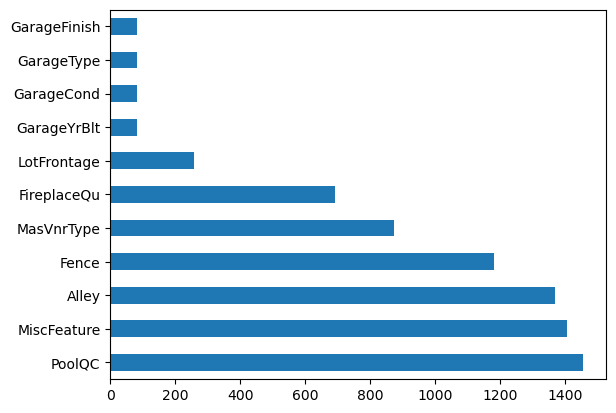

In [23]:
na.sort_values(ascending=False)[0:11].plot(kind='barh')

### columns having more than 50% null values:
### 1.Fence
### 2.Alley
### 3.MiscFeature
### 4.PoolQC
### So we will drop these columns.

### null value treatment 

In [24]:
for i in df.columns:
    if df[i].dtypes==object:
        df[i]=df[i].fillna(df[i].mode()[0])
    else:
        df[i]=df[i].fillna(df[i].mean())

In [25]:
na1=df.isna().sum()

<Axes: >

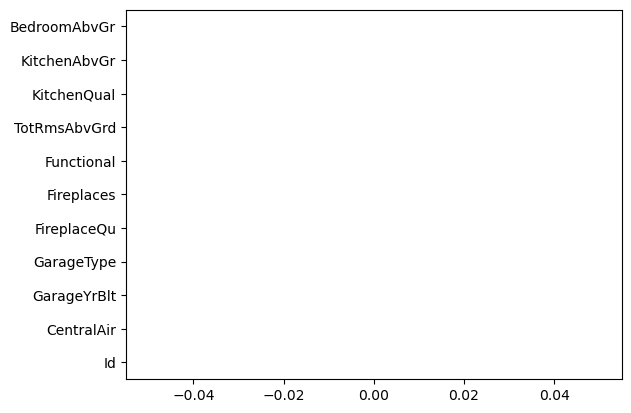

In [26]:
na1.sort_values(ascending=False)[0:11].plot(kind='barh')

### Dropping the features with more than 50% null values

In [27]:
df1=df.drop(labels=['FireplaceQu','MasVnrType','Fence','Alley','MiscFeature','PoolQC'],axis=1)

In [28]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

### Univariate Analysis

### For numerical features Histplot is plotted to understand the skewness of the features

Id


C:\Users\ANMOL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


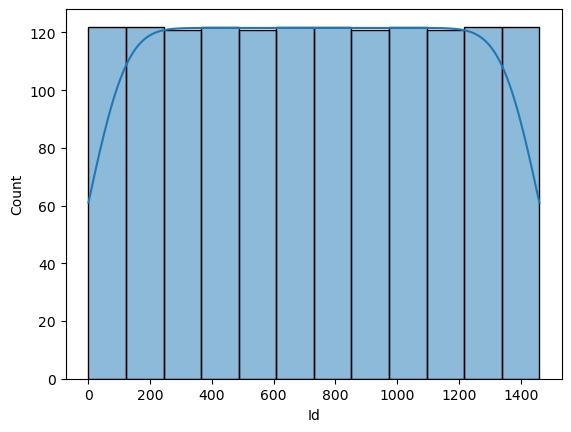

C:\Users\ANMOL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


MSSubClass


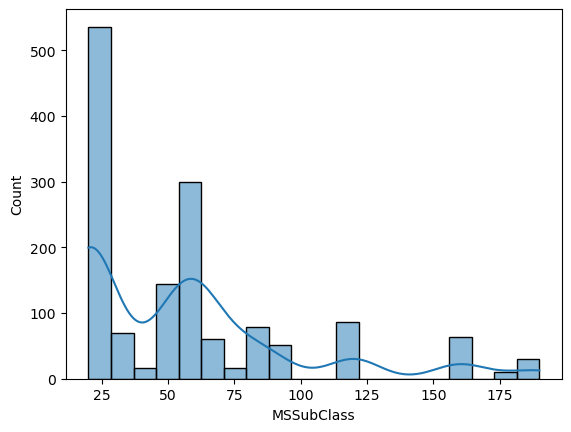

C:\Users\ANMOL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


LotFrontage


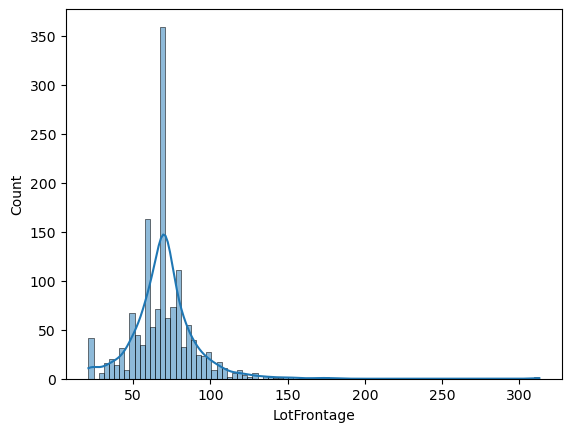

C:\Users\ANMOL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


LotArea


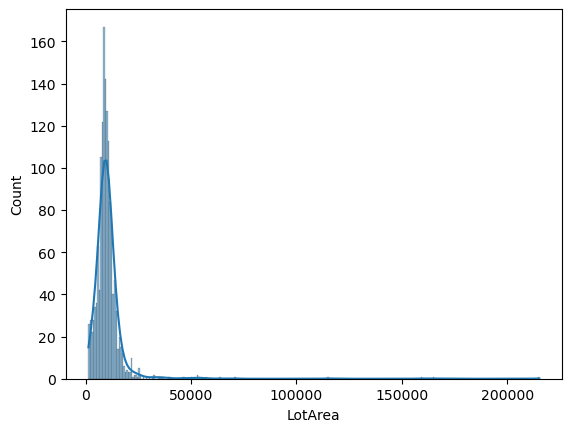

C:\Users\ANMOL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


OverallQual


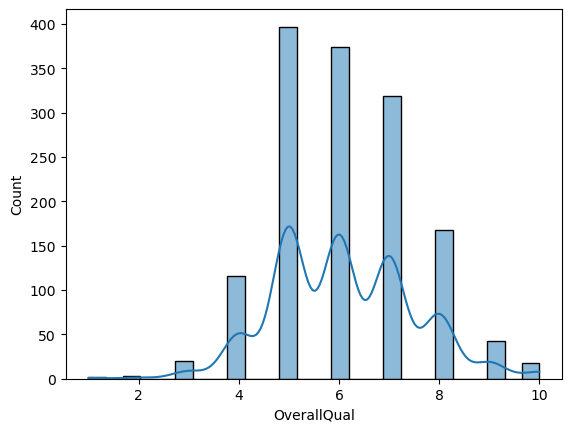

C:\Users\ANMOL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


OverallCond


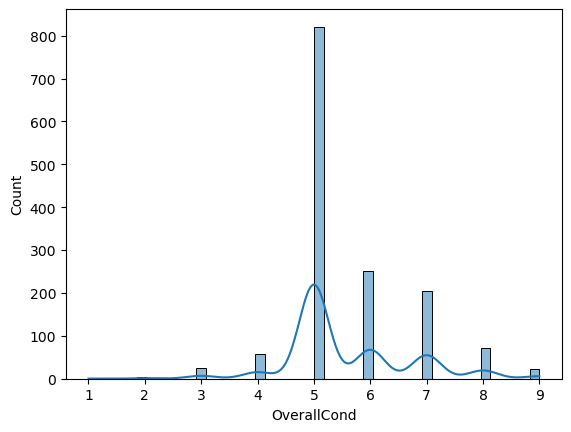

C:\Users\ANMOL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


YearBuilt


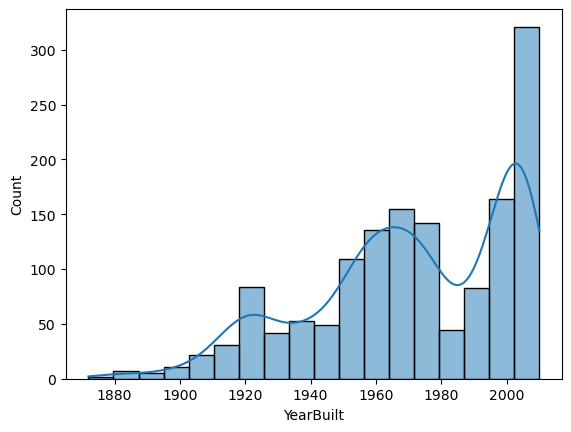

C:\Users\ANMOL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


YearRemodAdd


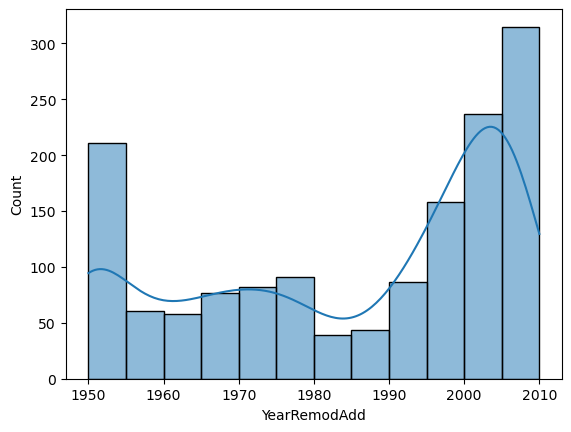

C:\Users\ANMOL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


MasVnrArea


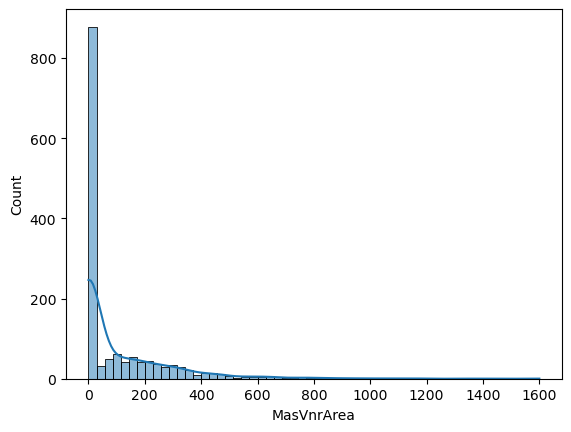

C:\Users\ANMOL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


BsmtFinSF1


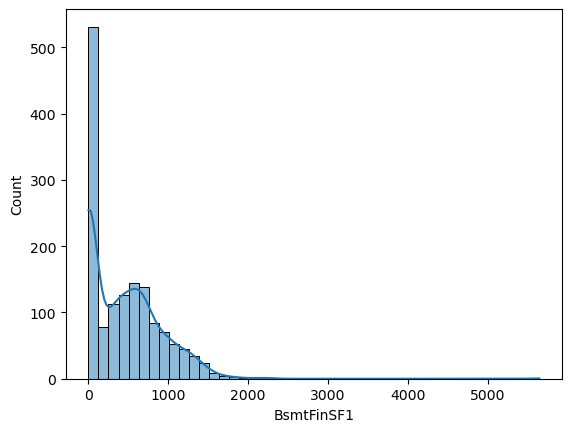

C:\Users\ANMOL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


BsmtFinSF2


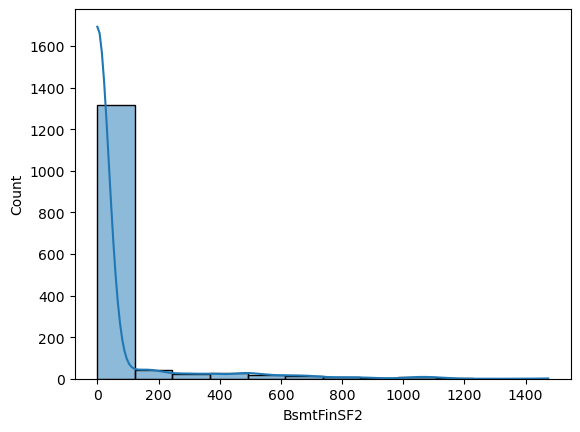

C:\Users\ANMOL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


BsmtUnfSF


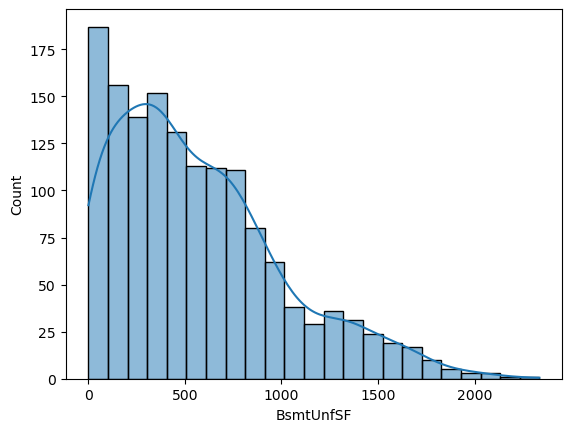

C:\Users\ANMOL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


TotalBsmtSF


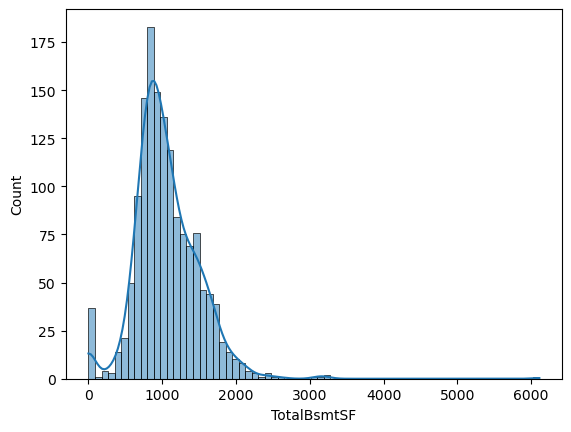

C:\Users\ANMOL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


1stFlrSF


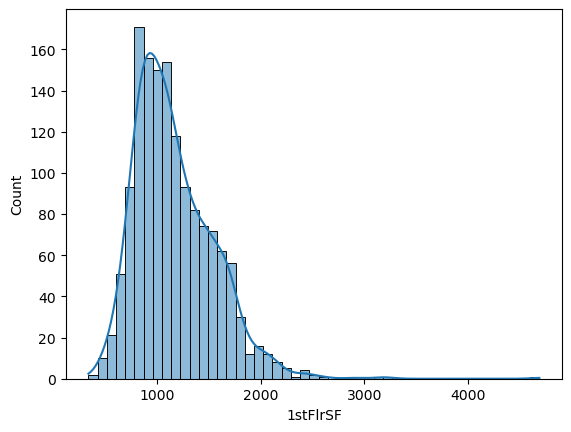

C:\Users\ANMOL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


2ndFlrSF


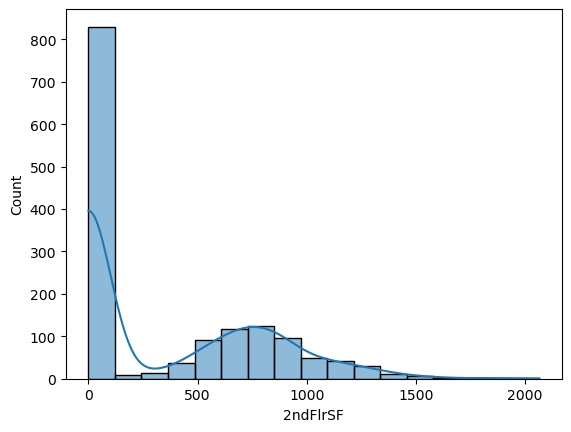

C:\Users\ANMOL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


LowQualFinSF


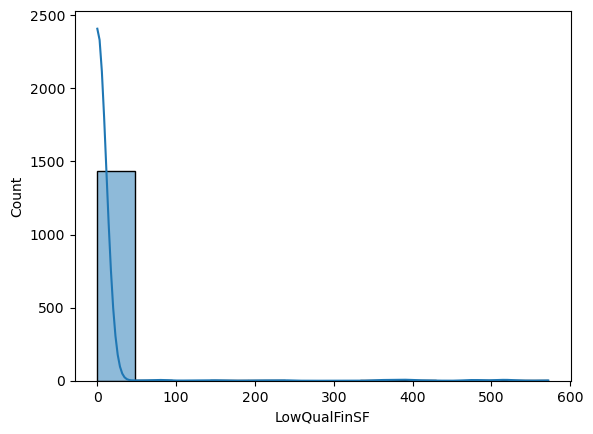

C:\Users\ANMOL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


GrLivArea


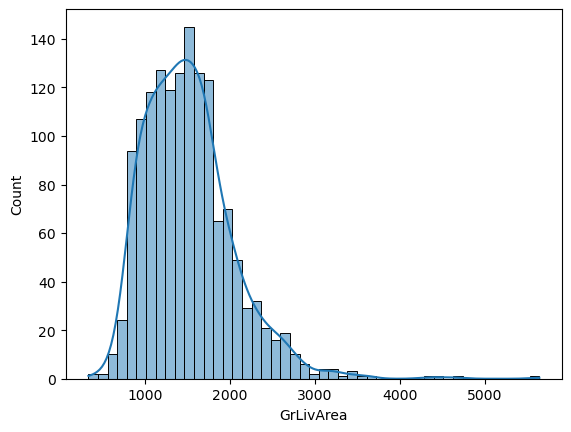

C:\Users\ANMOL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


BsmtFullBath


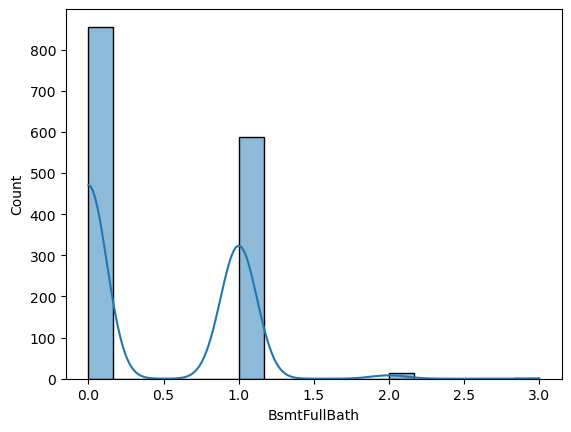

C:\Users\ANMOL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


BsmtHalfBath


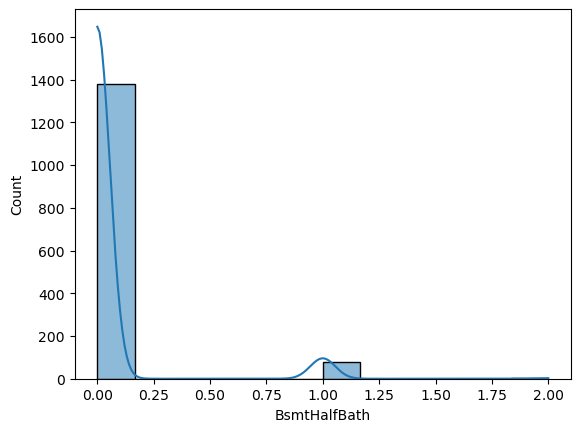

C:\Users\ANMOL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


FullBath


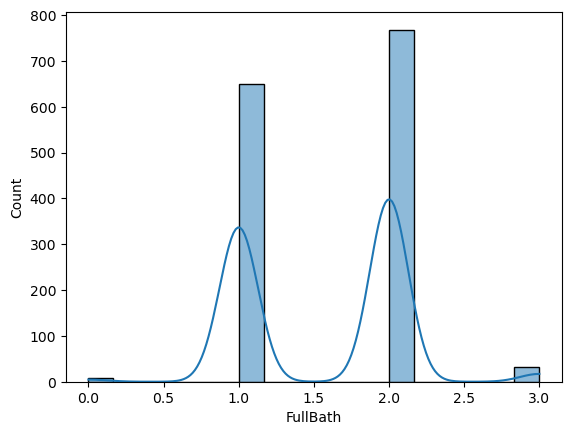

C:\Users\ANMOL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


HalfBath


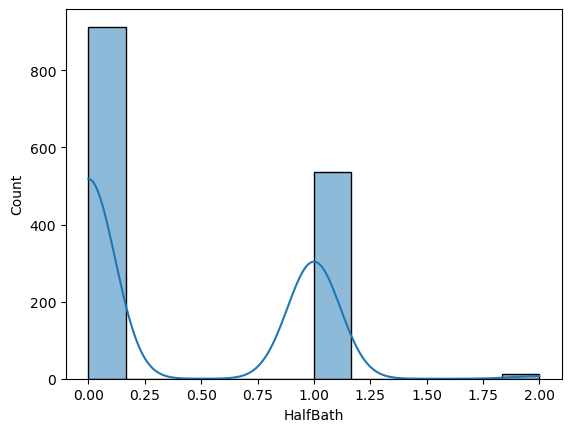

C:\Users\ANMOL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


BedroomAbvGr


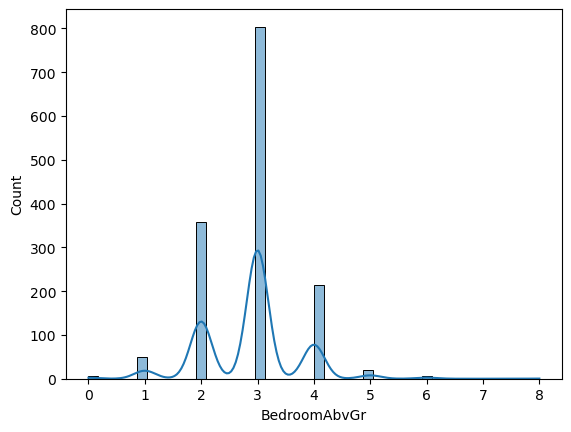

C:\Users\ANMOL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


KitchenAbvGr


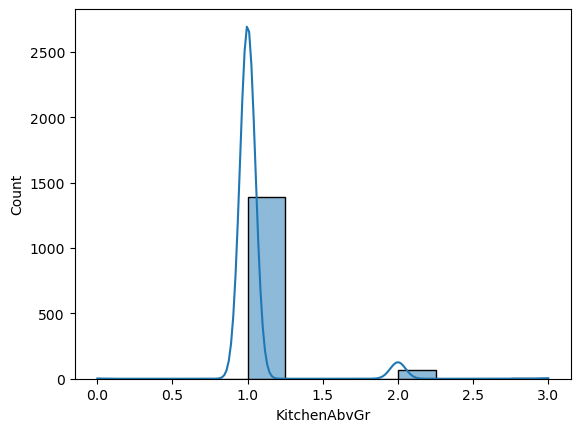

C:\Users\ANMOL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


TotRmsAbvGrd


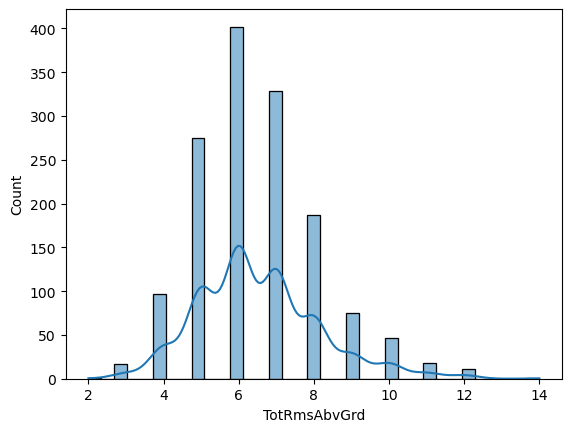

C:\Users\ANMOL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Fireplaces


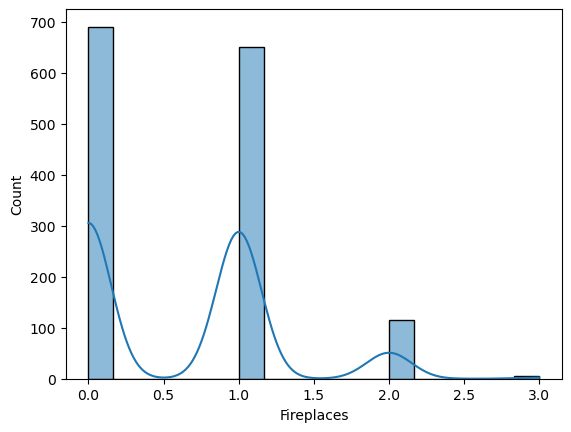

C:\Users\ANMOL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


GarageYrBlt


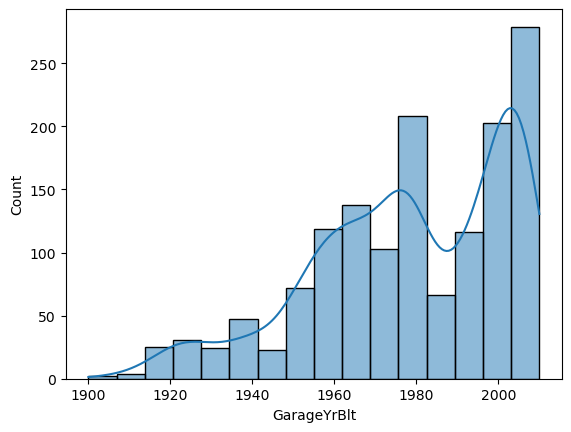

C:\Users\ANMOL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


GarageCars


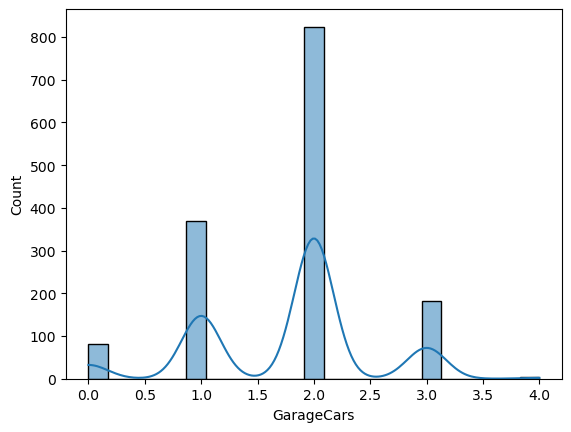

C:\Users\ANMOL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


GarageArea


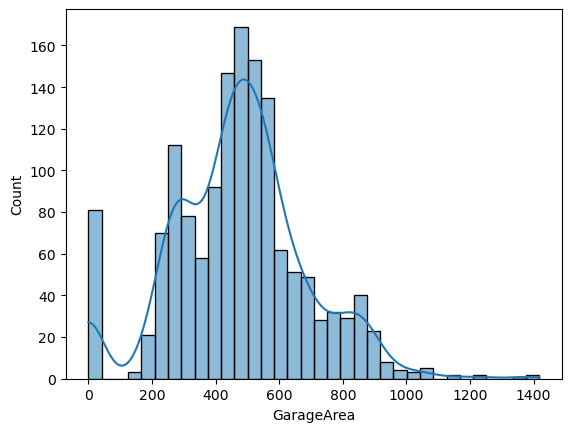

C:\Users\ANMOL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


WoodDeckSF


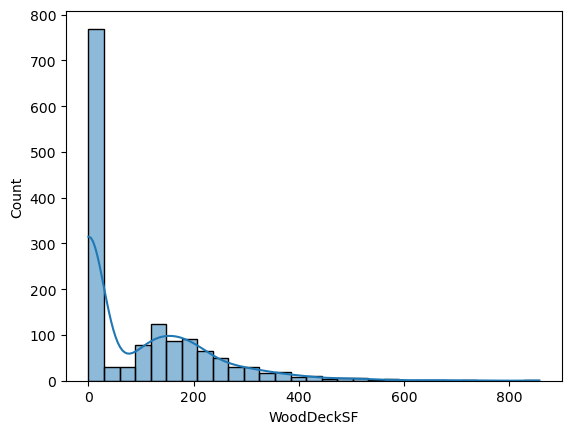

C:\Users\ANMOL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


OpenPorchSF


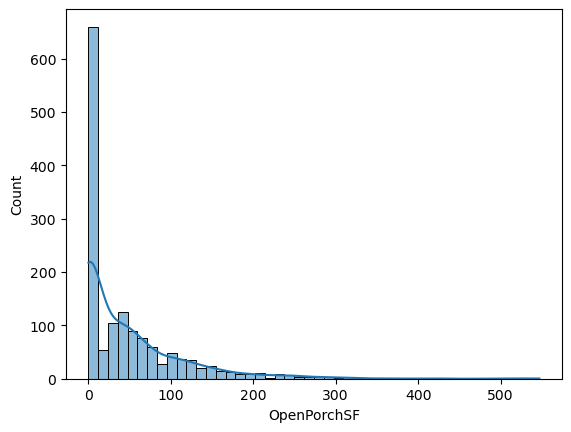

C:\Users\ANMOL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


EnclosedPorch


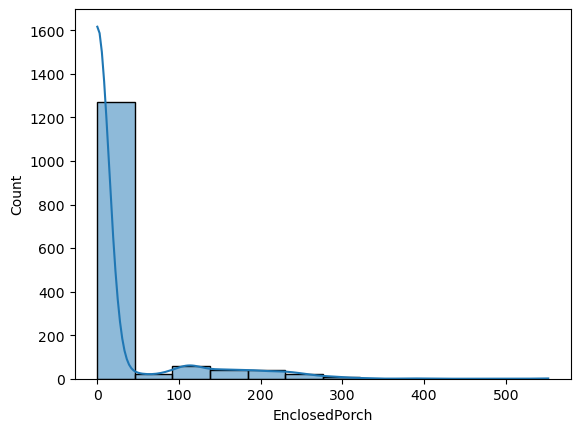

C:\Users\ANMOL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


3SsnPorch


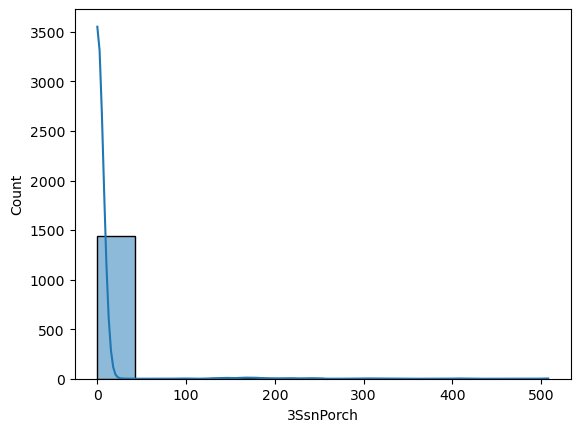

C:\Users\ANMOL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


ScreenPorch


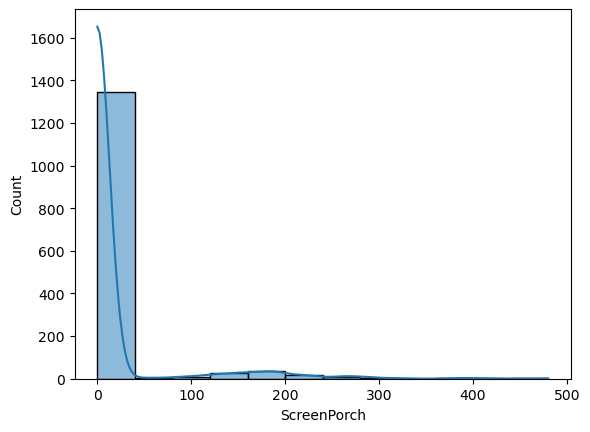

C:\Users\ANMOL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


PoolArea


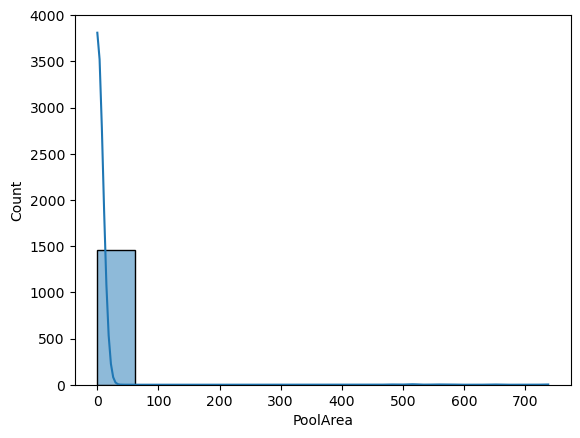

C:\Users\ANMOL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


MiscVal


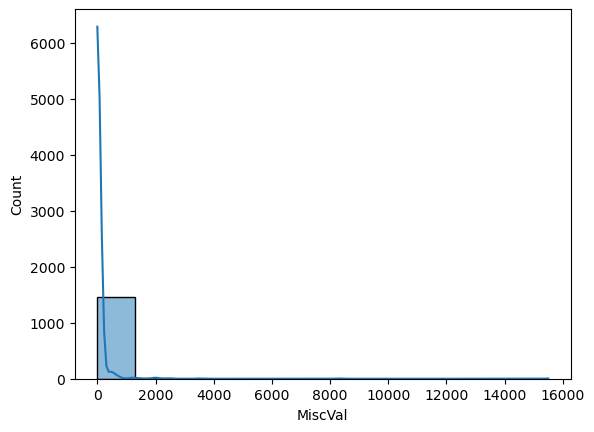

C:\Users\ANMOL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


MoSold


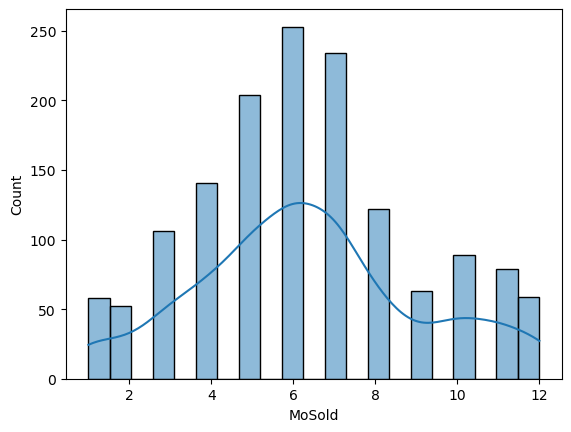

C:\Users\ANMOL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


YrSold


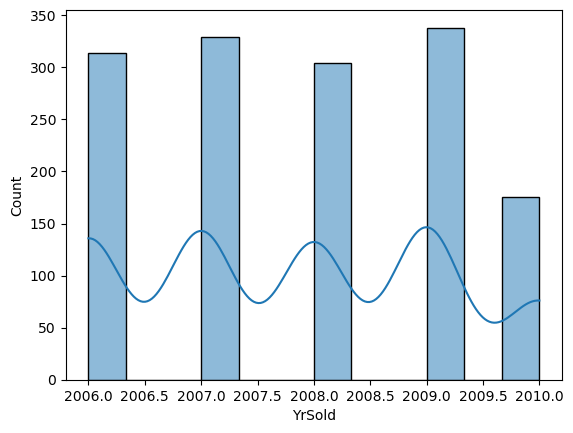

C:\Users\ANMOL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


SalePrice


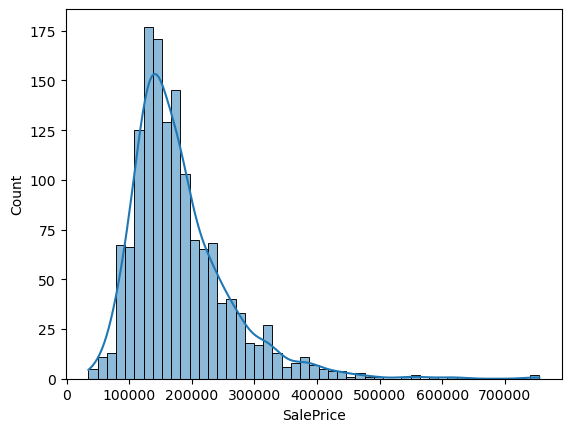

In [29]:
from matplotlib.pyplot import show
for i in df1.columns:
    if df1[i].dtypes!='object':
        sns.histplot(data=df1,x=i,kde=True)
        print(i)
        show()

### For categorical features Piechart is plotted to understand the distribution of the values in the features

MSZoning


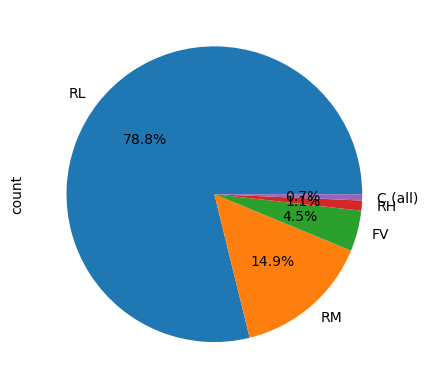

Street


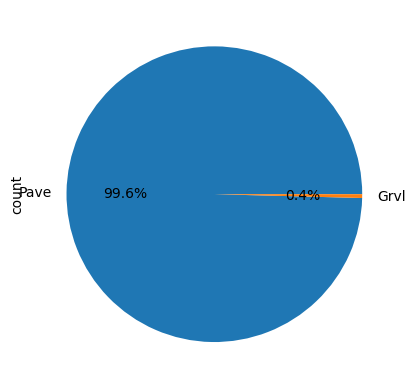

LotShape


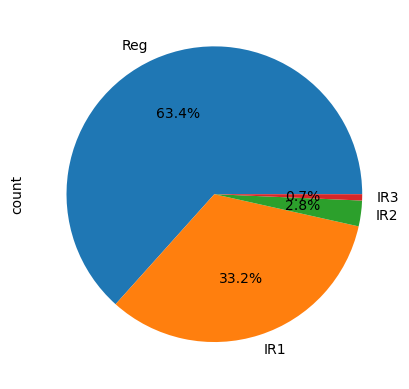

LandContour


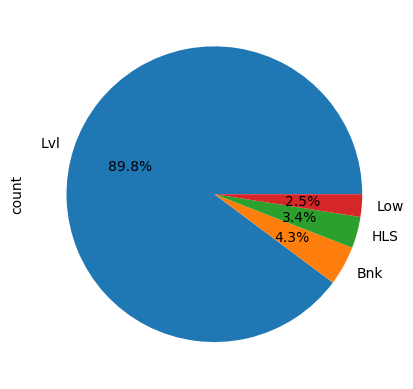

Utilities


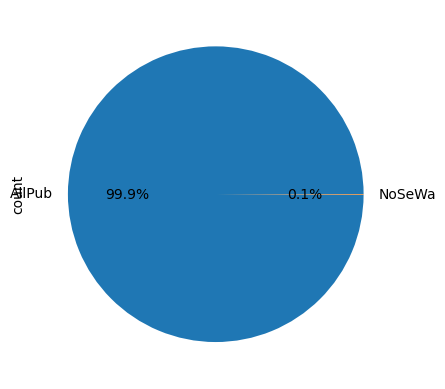

LotConfig


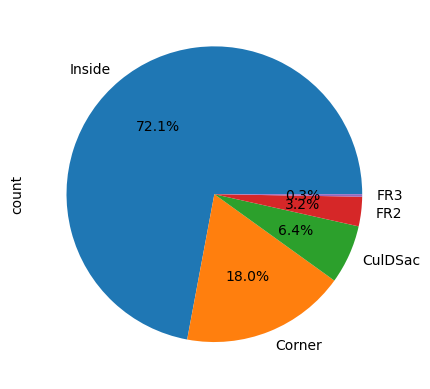

LandSlope


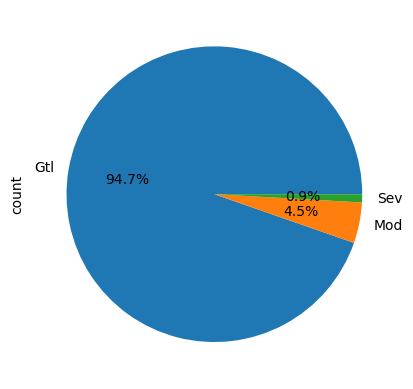

Neighborhood


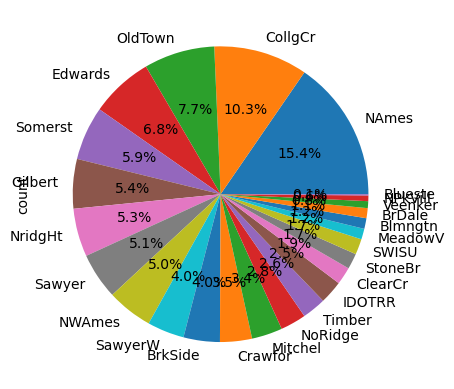

Condition1


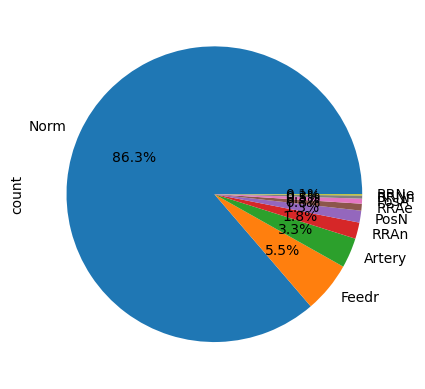

Condition2


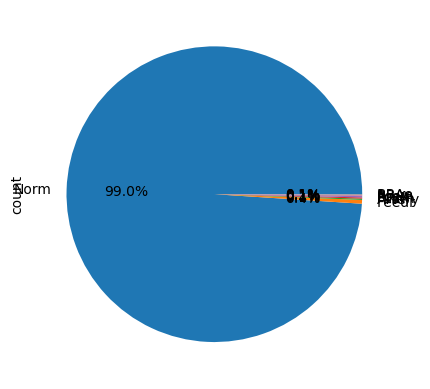

BldgType


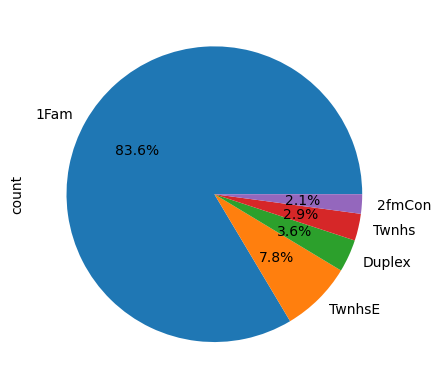

HouseStyle


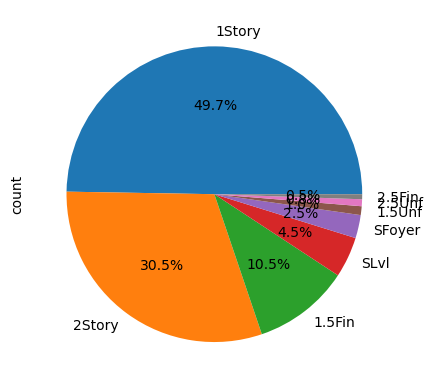

RoofStyle


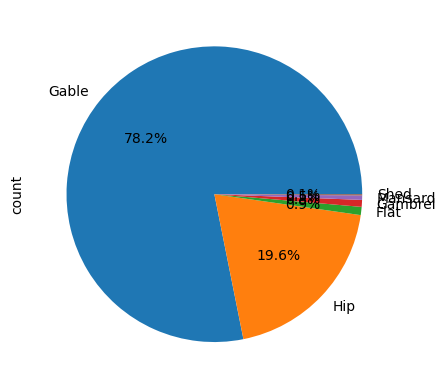

RoofMatl


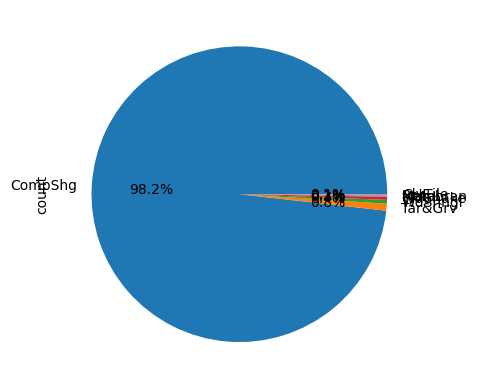

Exterior1st


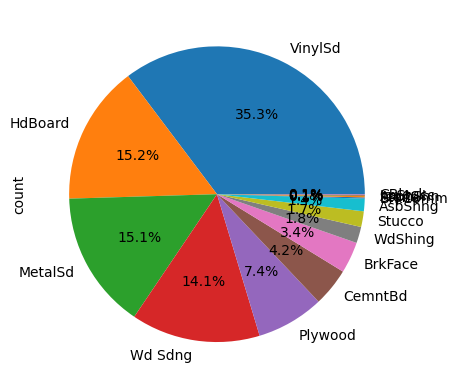

Exterior2nd


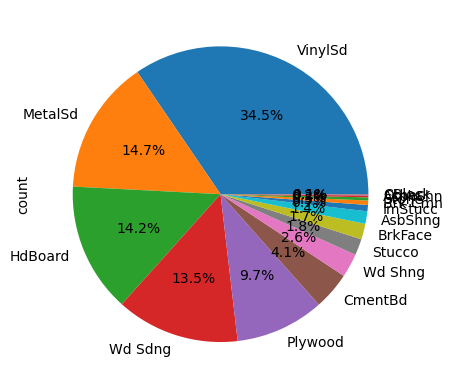

ExterQual


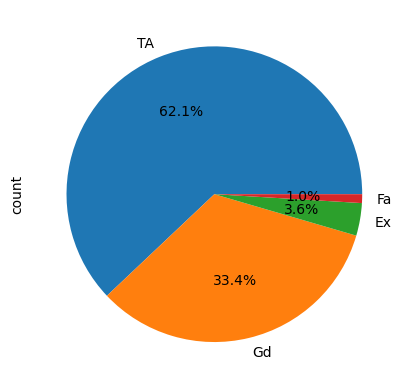

ExterCond


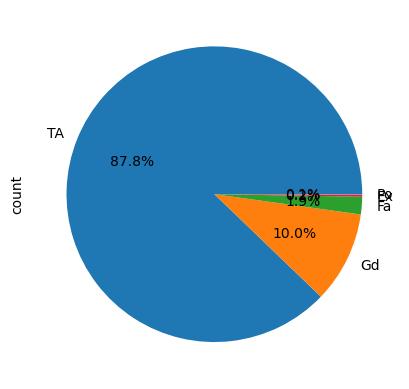

Foundation


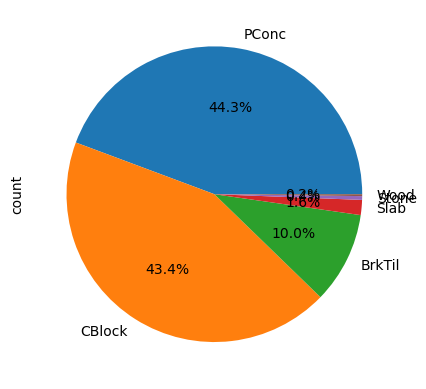

BsmtQual


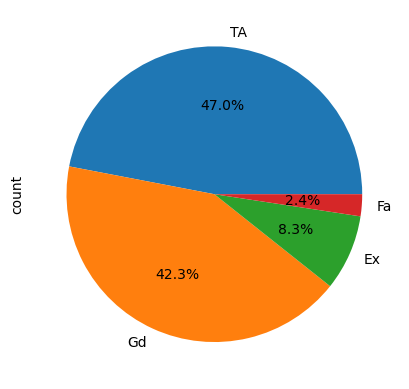

BsmtCond


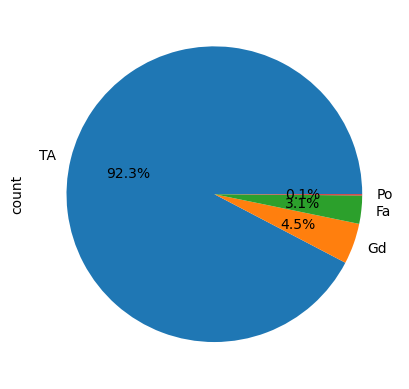

BsmtExposure


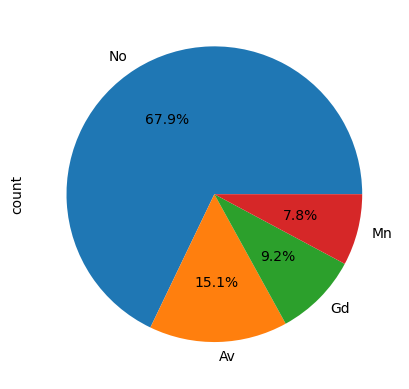

BsmtFinType1


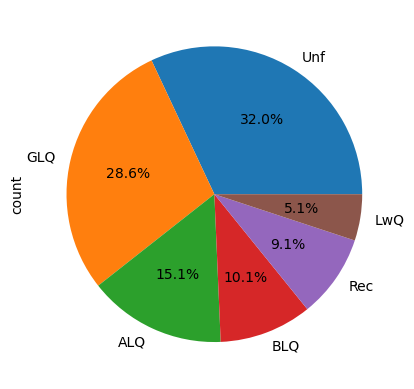

BsmtFinType2


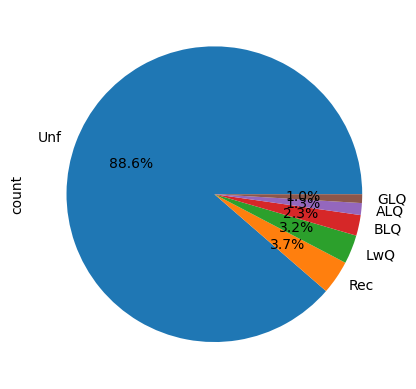

Heating


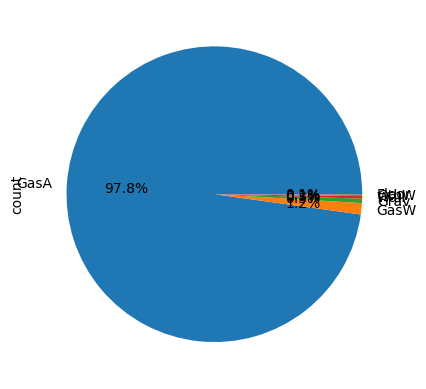

HeatingQC


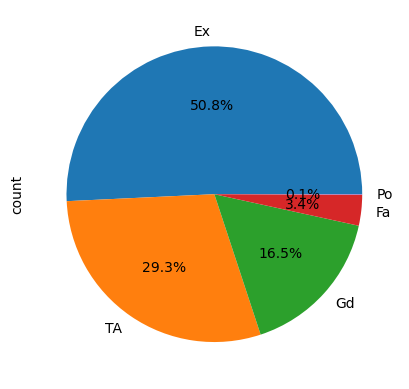

CentralAir


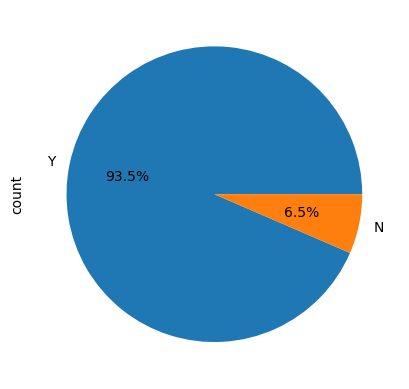

Electrical


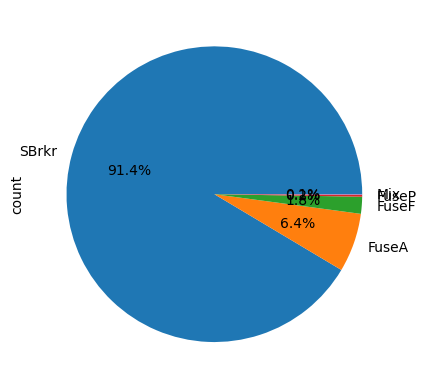

KitchenQual


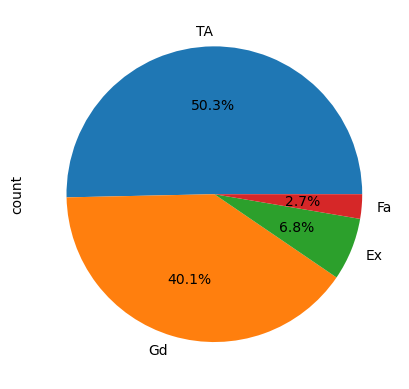

Functional


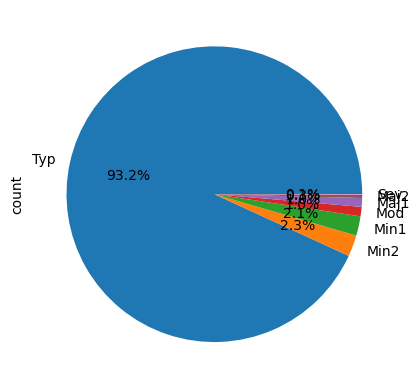

GarageType


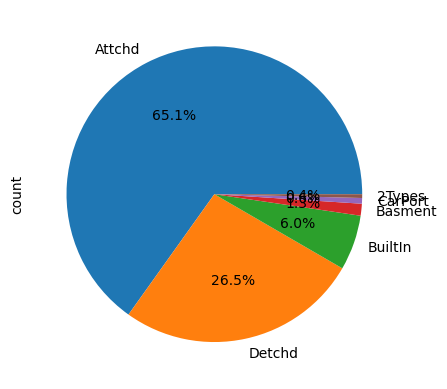

GarageFinish


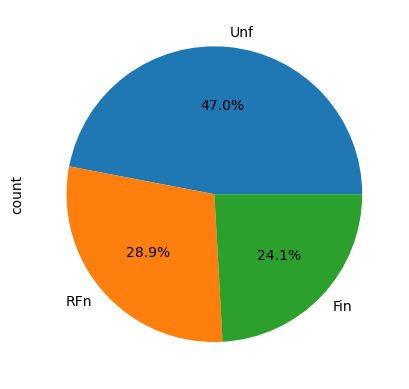

GarageQual


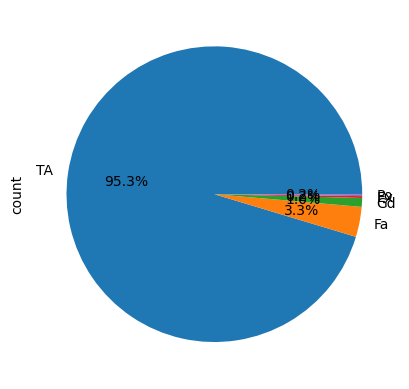

GarageCond


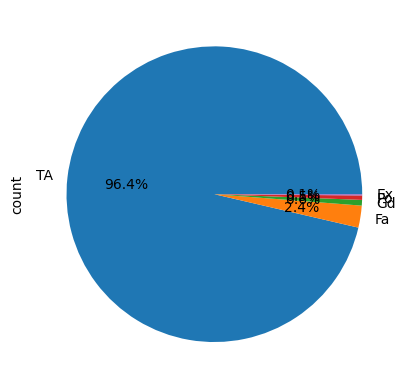

PavedDrive


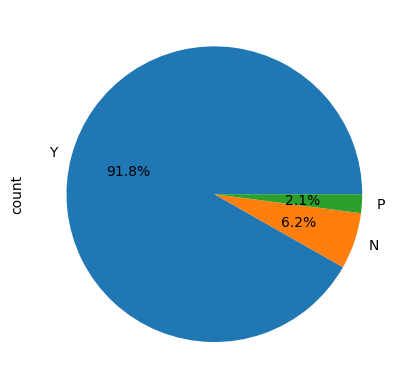

SaleType


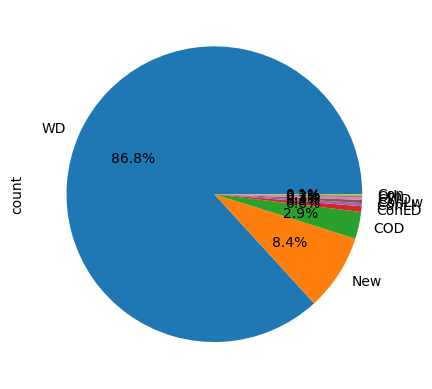

SaleCondition


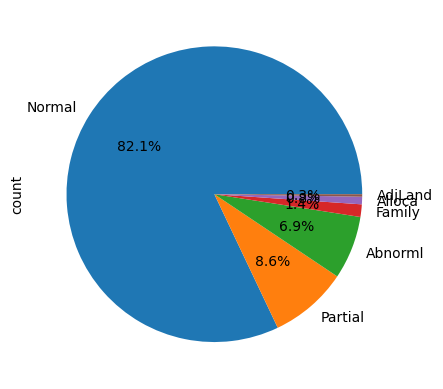

In [30]:
from matplotlib.pyplot import show
for i in df1.columns:
    if df1[i].dtypes==object:
        df1[i].value_counts().plot(kind='pie',autopct='%1.1f%%')
        print(i)
        show()

### Bivariate Analysis

Id


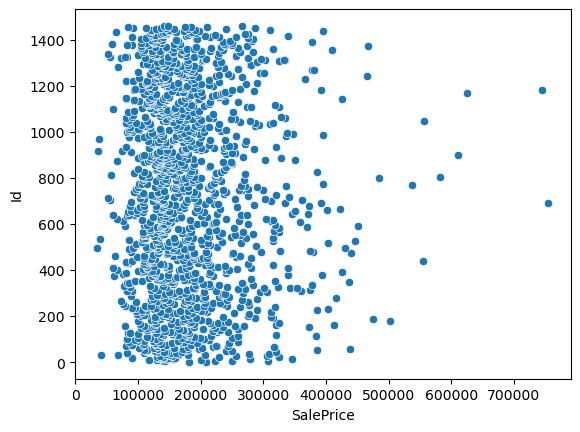

MSSubClass


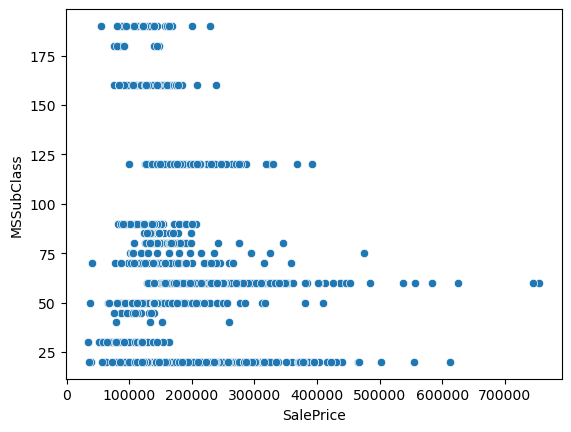

LotFrontage


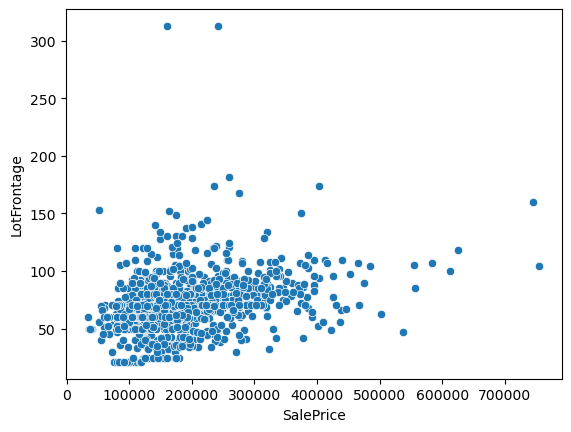

LotArea


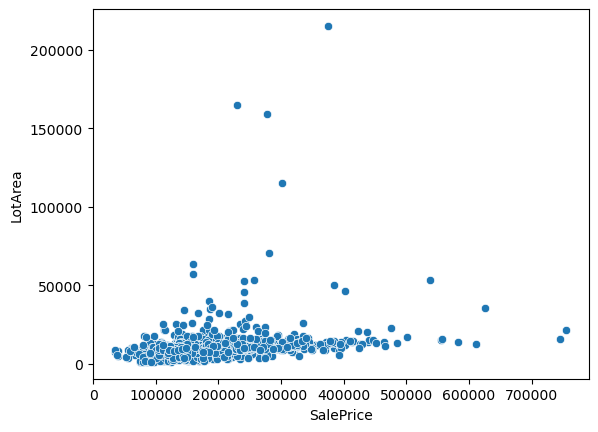

OverallQual


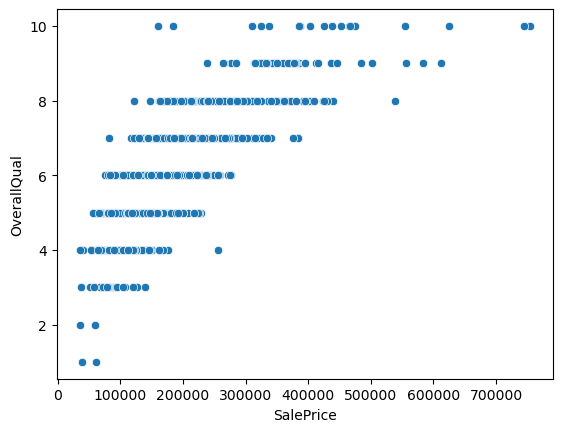

OverallCond


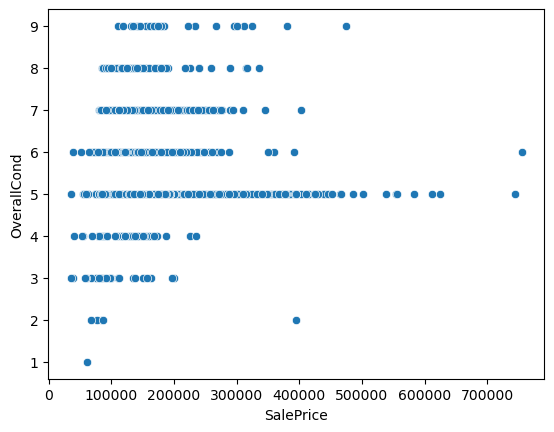

YearBuilt


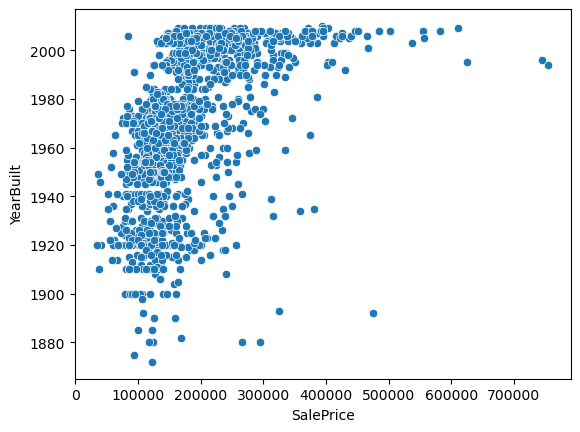

YearRemodAdd


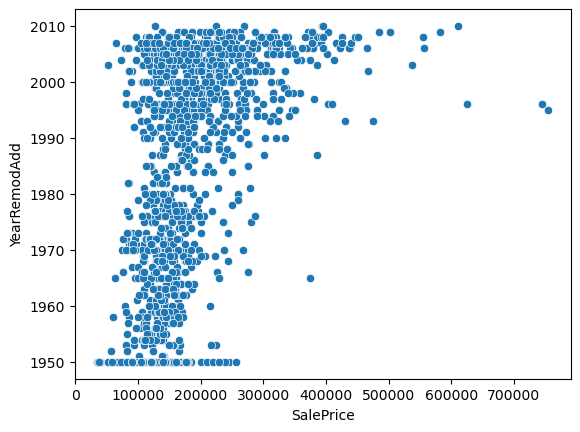

MasVnrArea


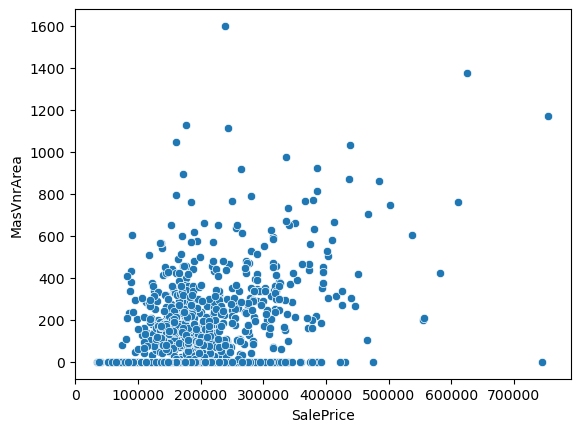

BsmtFinSF1


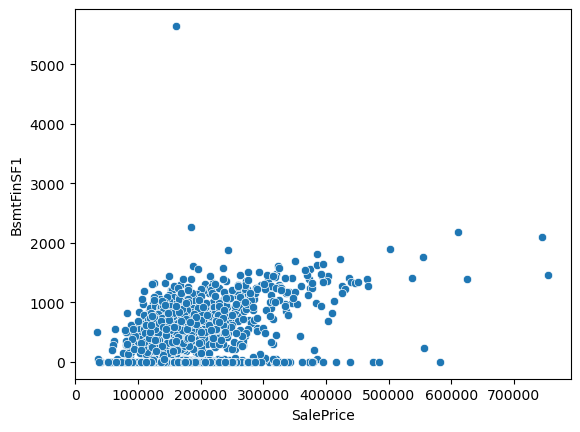

BsmtFinSF2


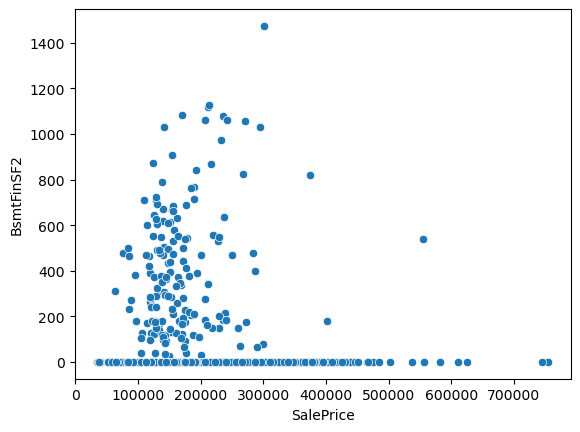

BsmtUnfSF


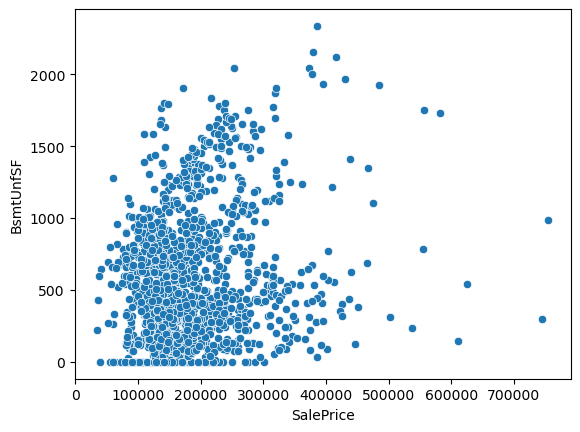

TotalBsmtSF


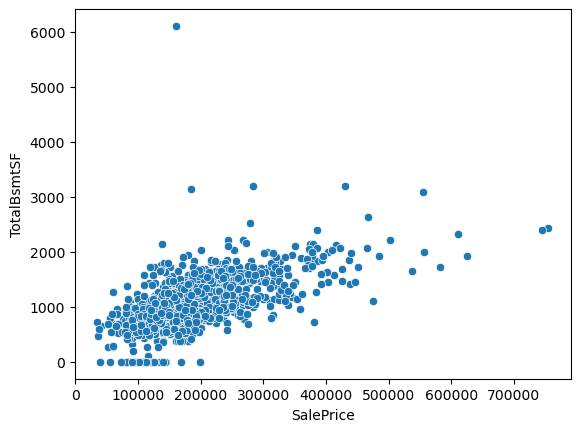

1stFlrSF


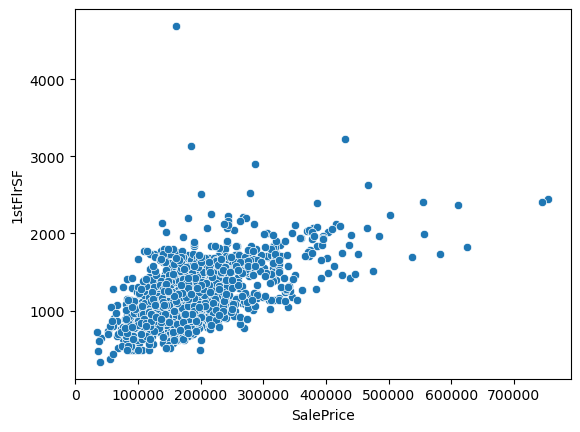

2ndFlrSF


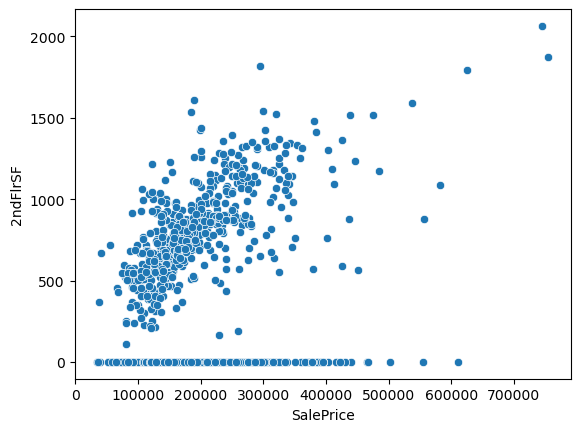

LowQualFinSF


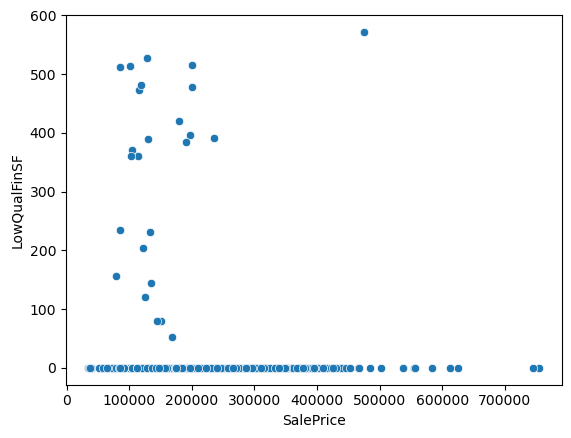

GrLivArea


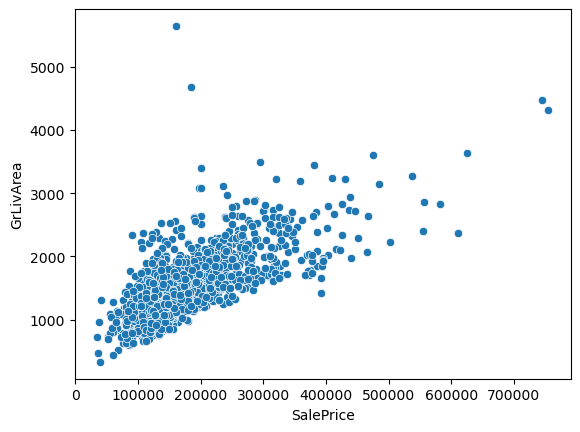

BsmtFullBath


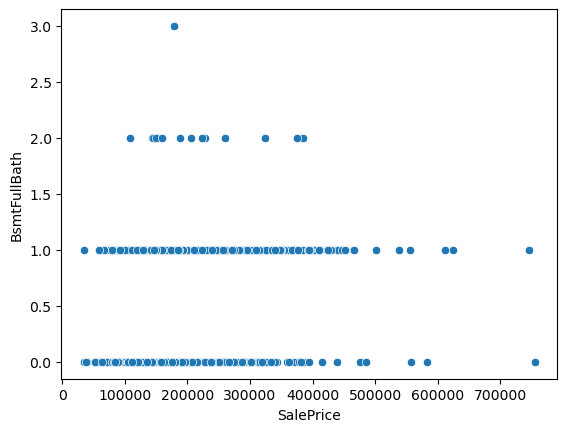

BsmtHalfBath


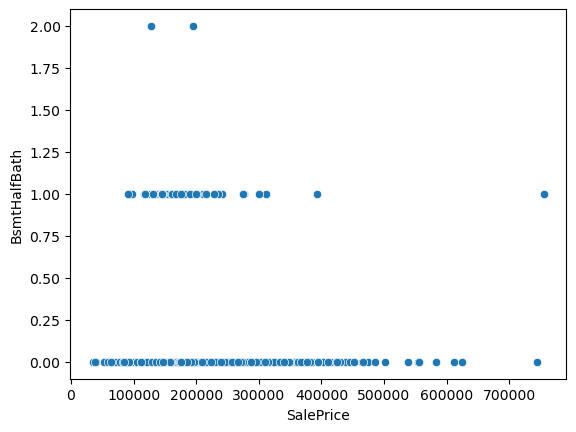

FullBath


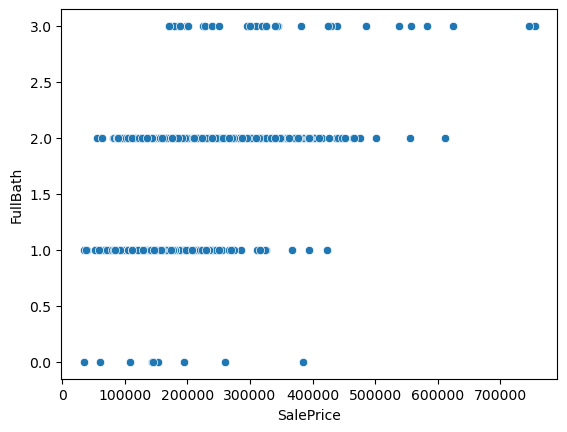

HalfBath


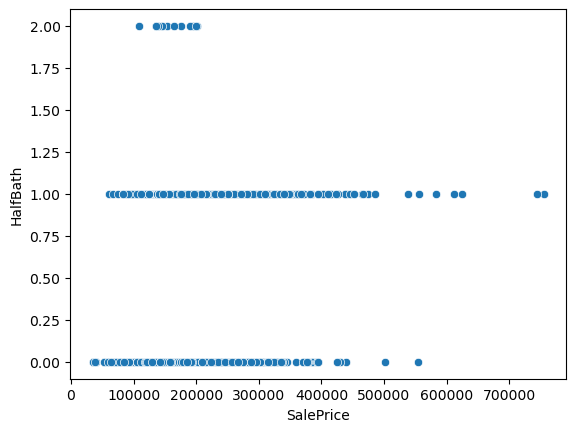

BedroomAbvGr


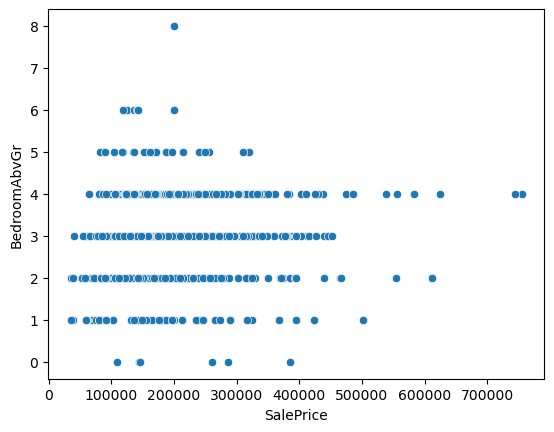

KitchenAbvGr


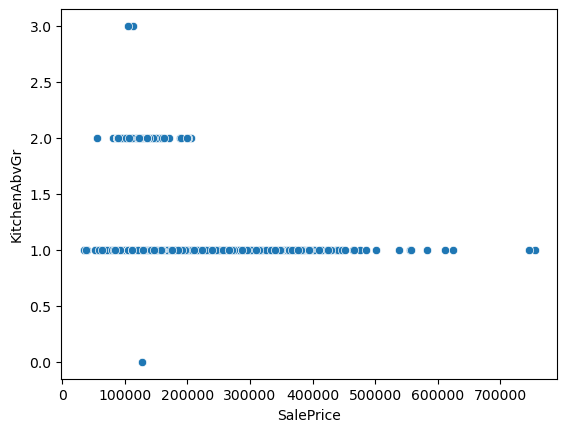

TotRmsAbvGrd


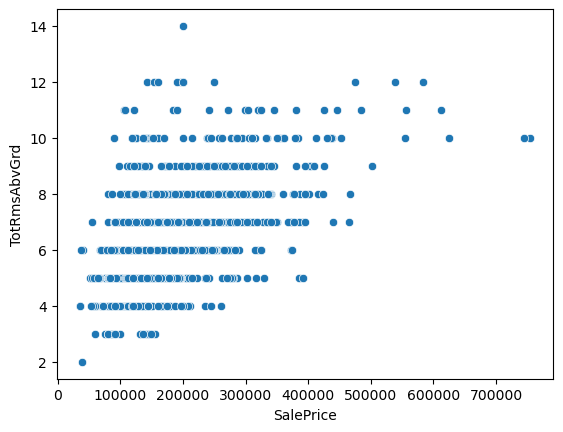

Fireplaces


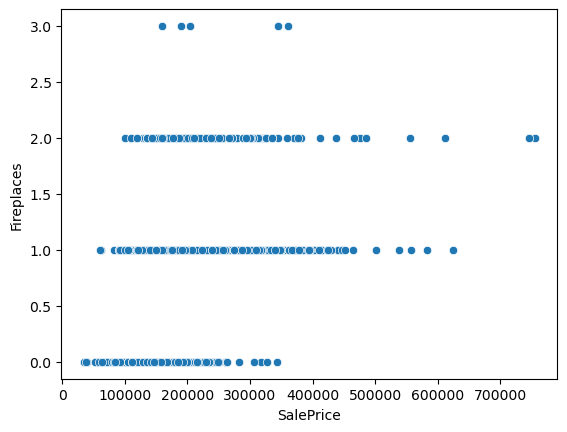

GarageYrBlt


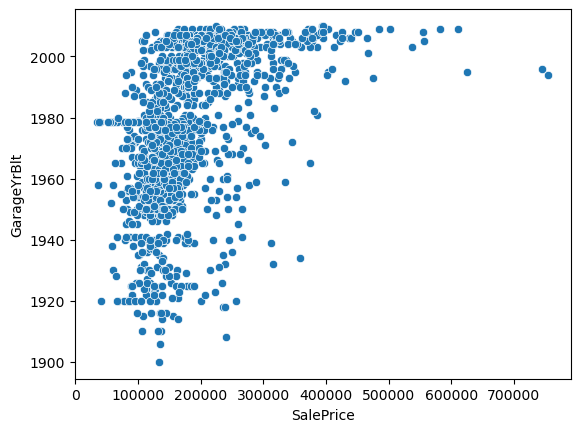

GarageCars


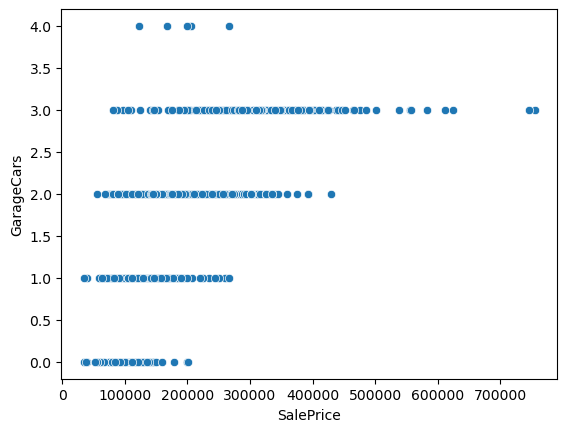

GarageArea


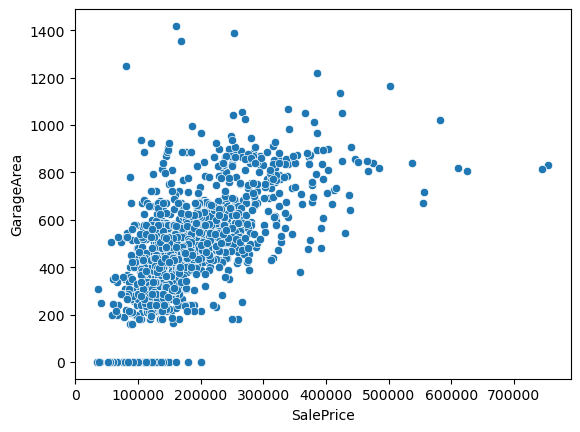

WoodDeckSF


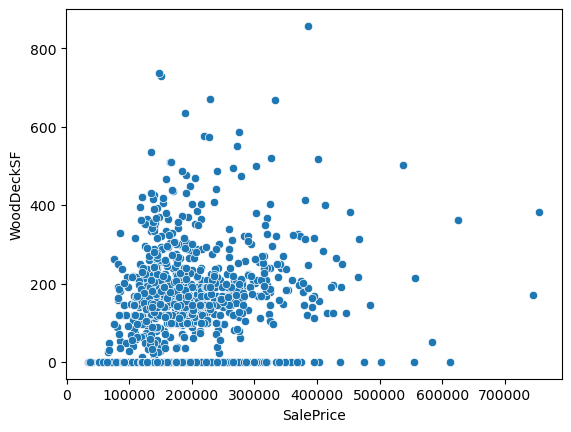

OpenPorchSF


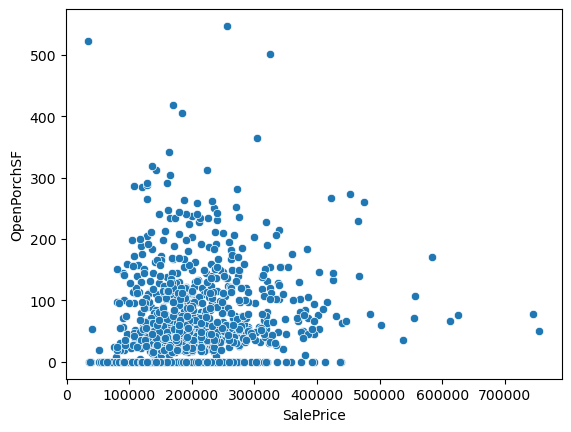

EnclosedPorch


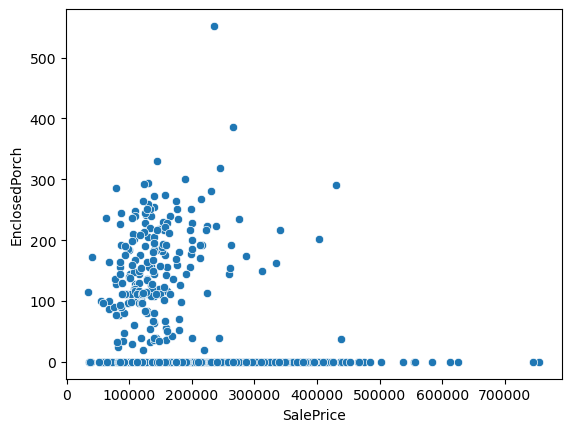

3SsnPorch


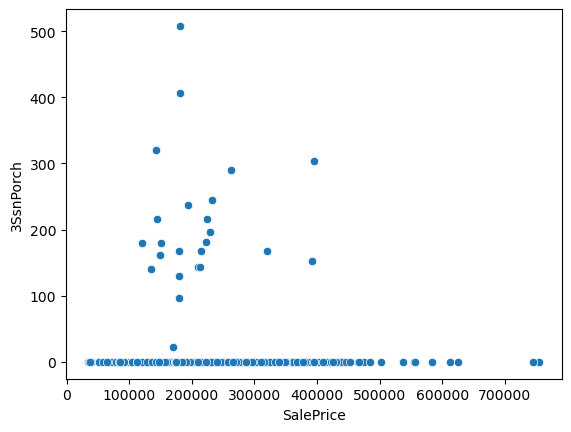

ScreenPorch


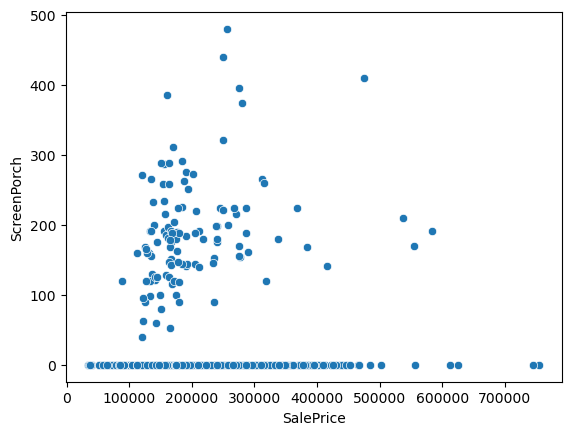

PoolArea


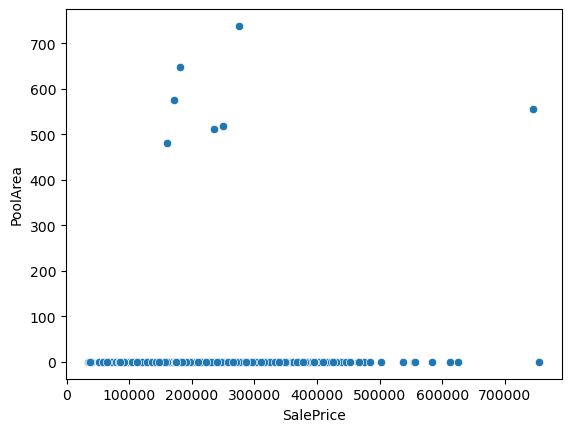

MiscVal


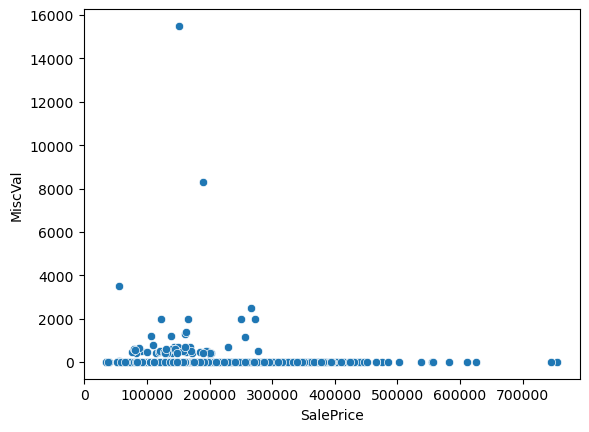

MoSold


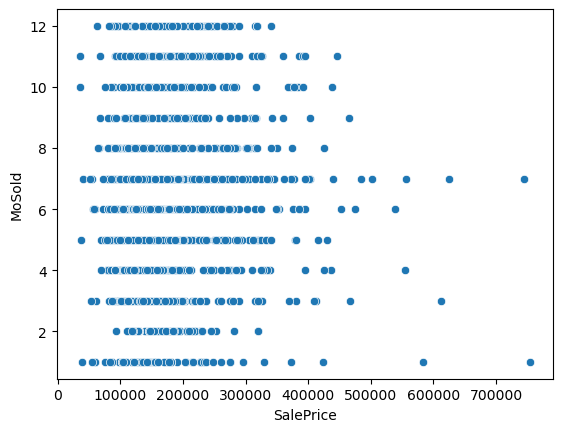

YrSold


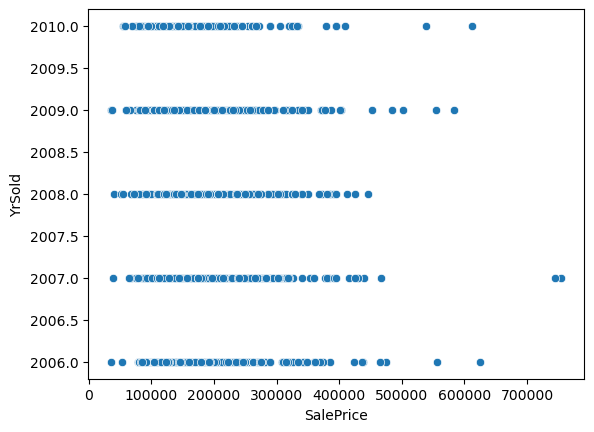

SalePrice


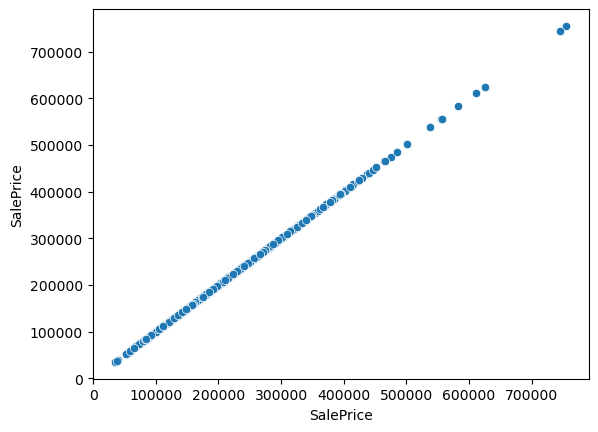

In [31]:
for i in df1.columns:
    if df1[i].dtypes!=object:
        sns.scatterplot(data=df1,x='SalePrice',y=i)
        print(i)
        show()

### Boxplots to see relation between numerical and categorical features

MSZoning


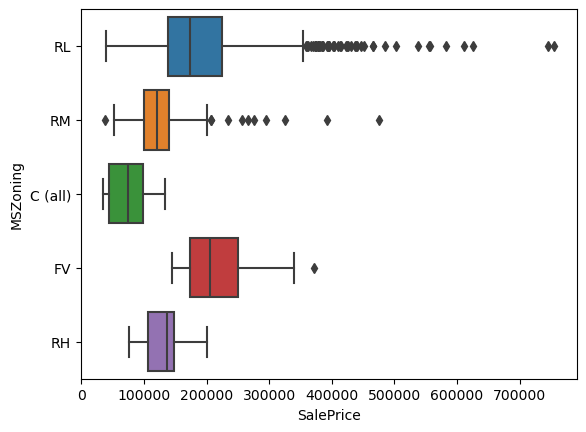

Street


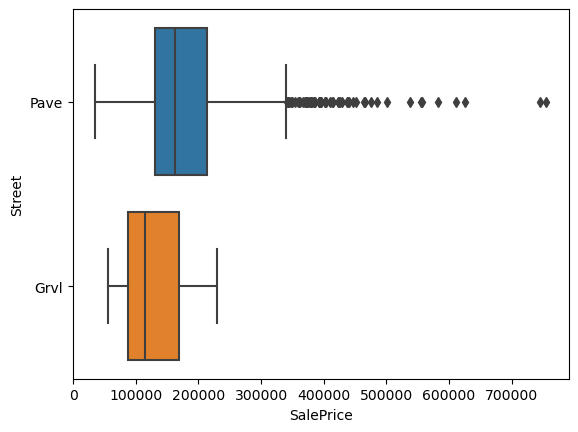

LotShape


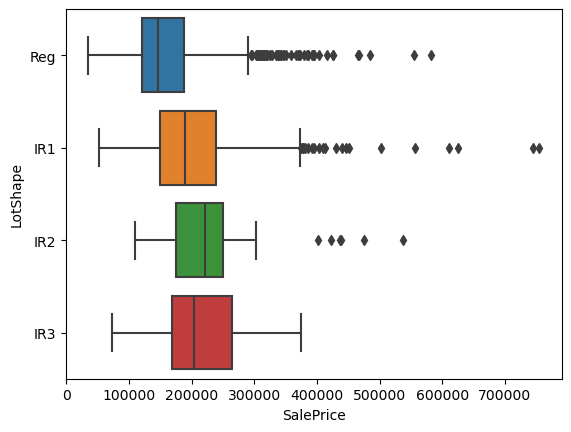

LandContour


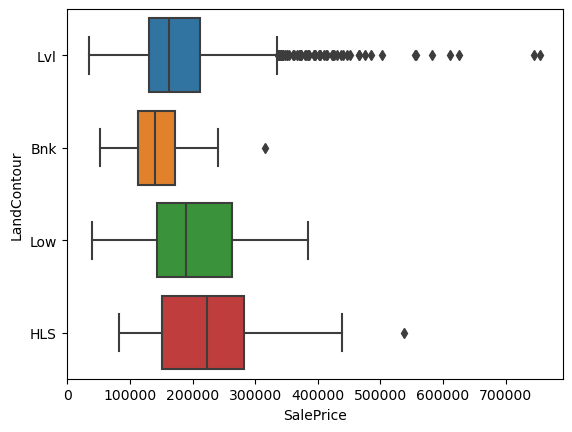

Utilities


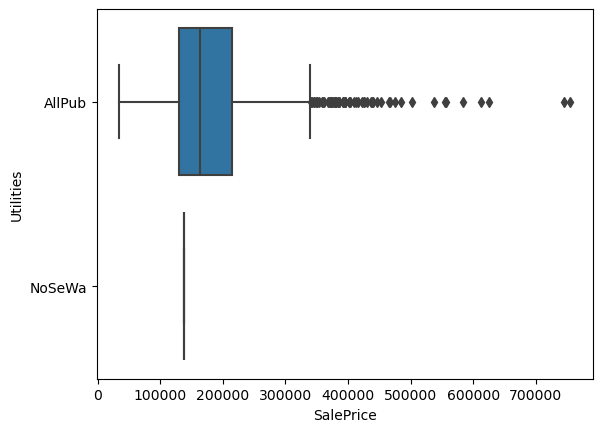

LotConfig


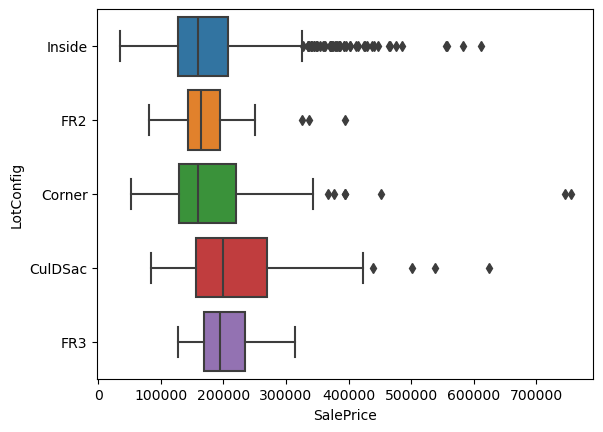

LandSlope


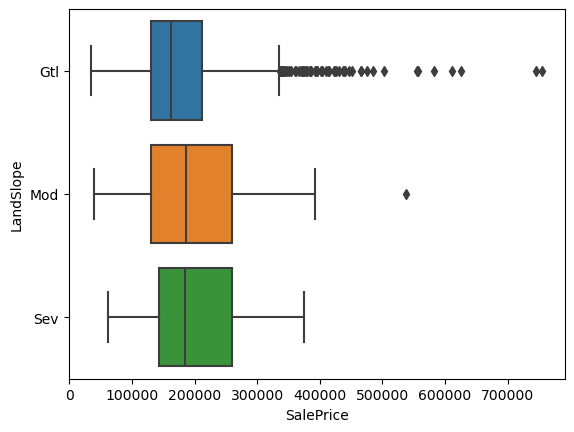

Neighborhood


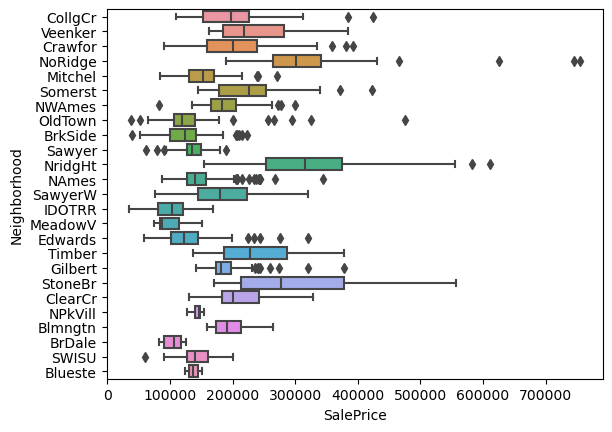

Condition1


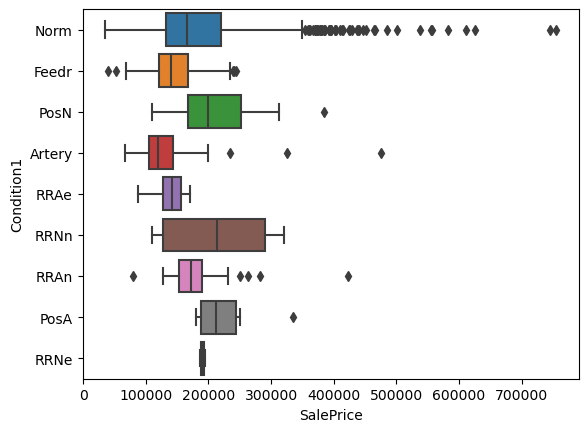

Condition2


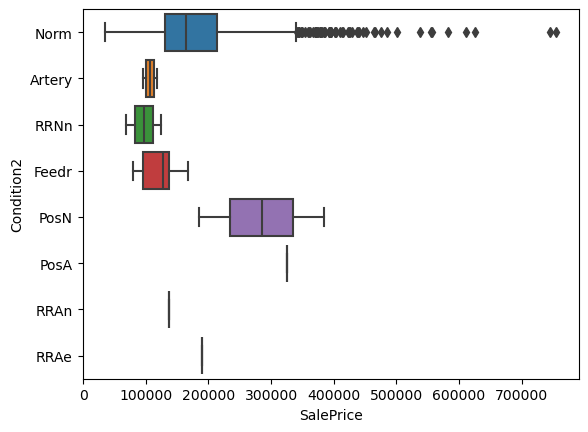

BldgType


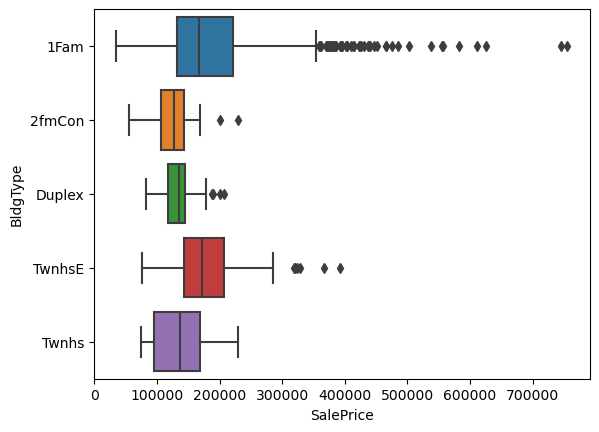

HouseStyle


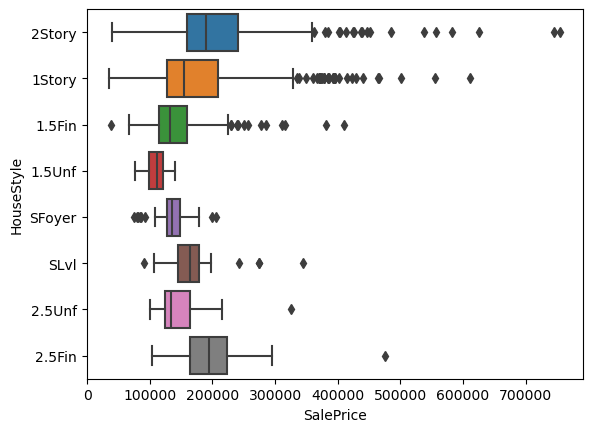

RoofStyle


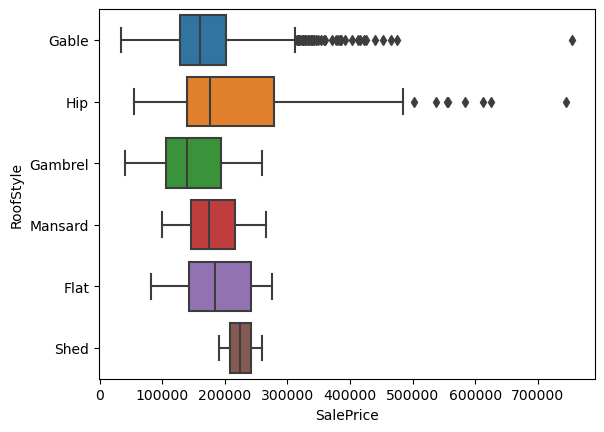

RoofMatl


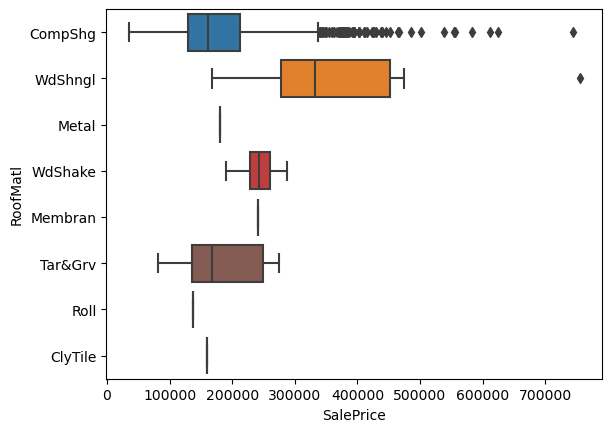

Exterior1st


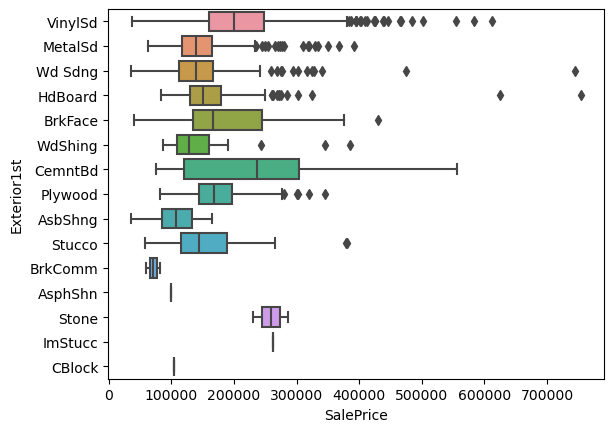

Exterior2nd


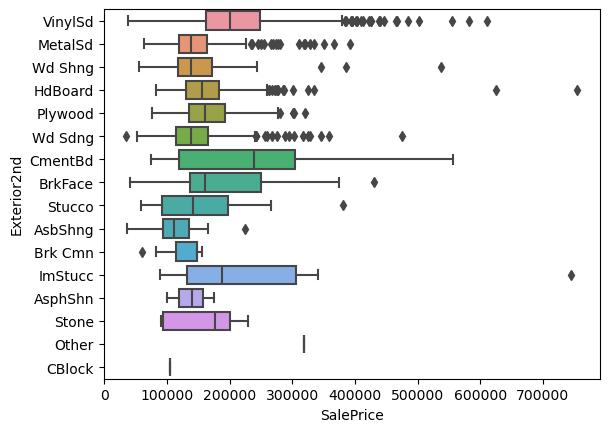

ExterQual


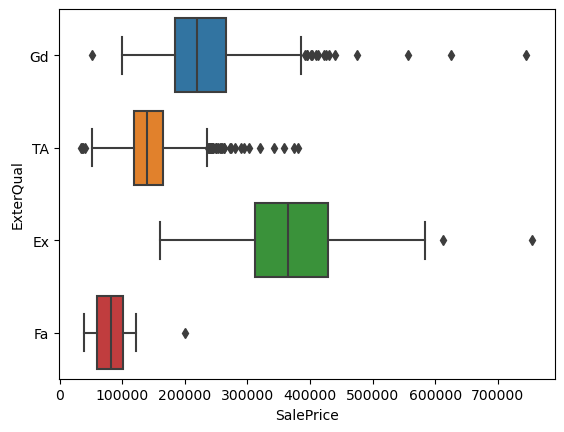

ExterCond


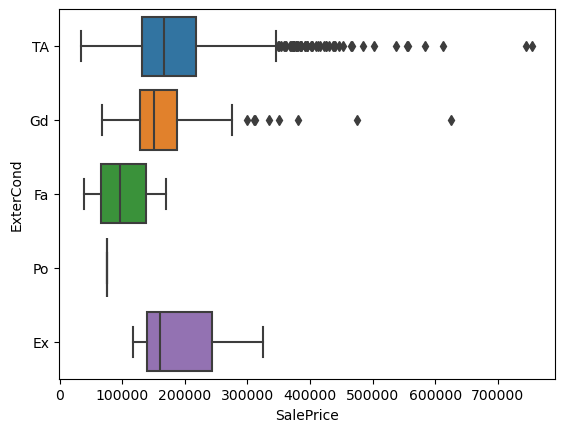

Foundation


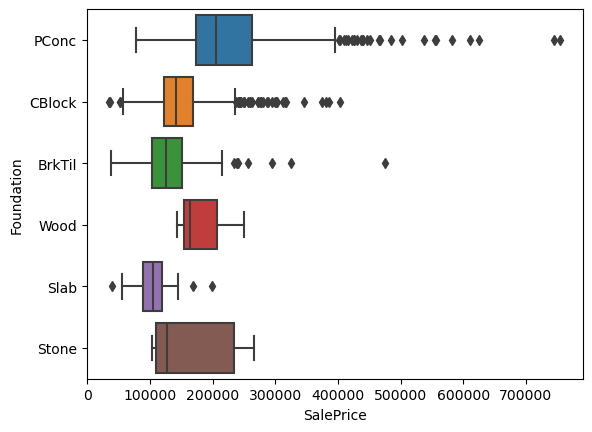

BsmtQual


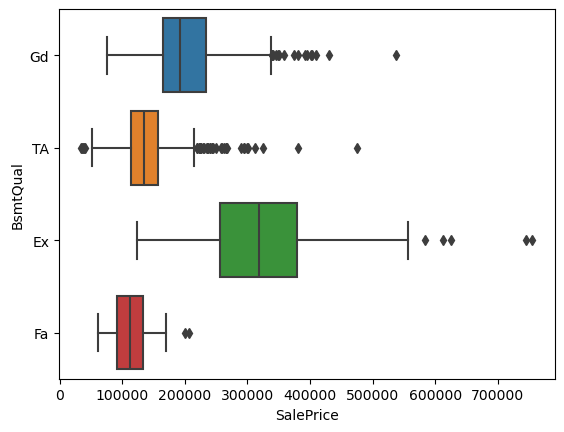

BsmtCond


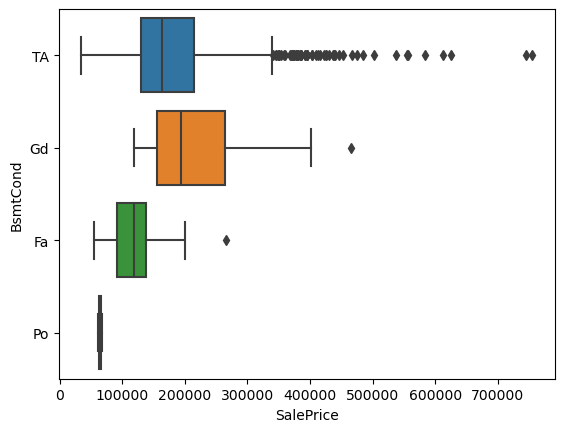

BsmtExposure


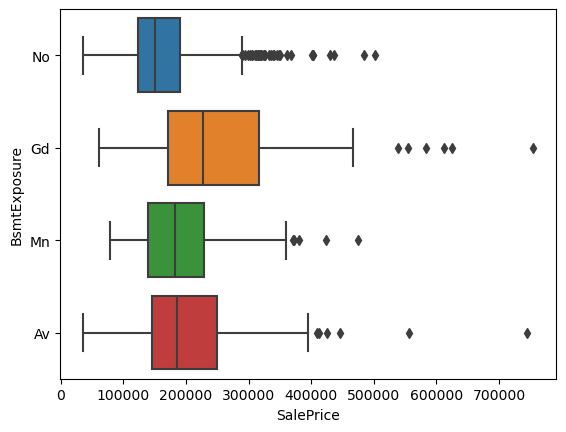

BsmtFinType1


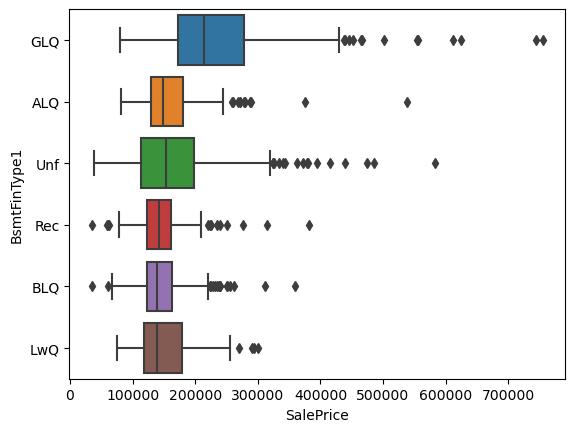

BsmtFinType2


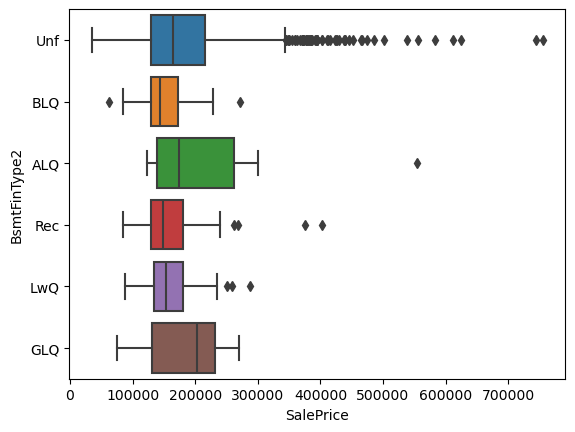

Heating


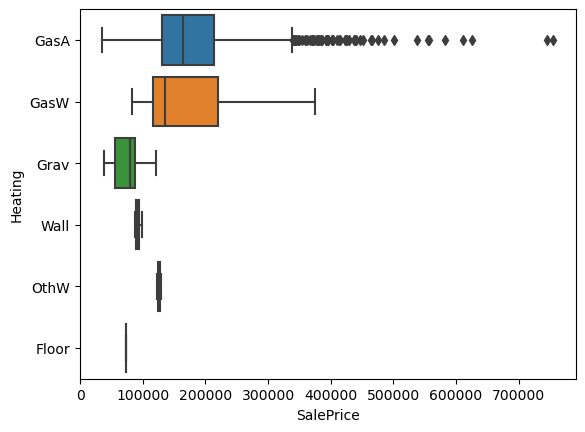

HeatingQC


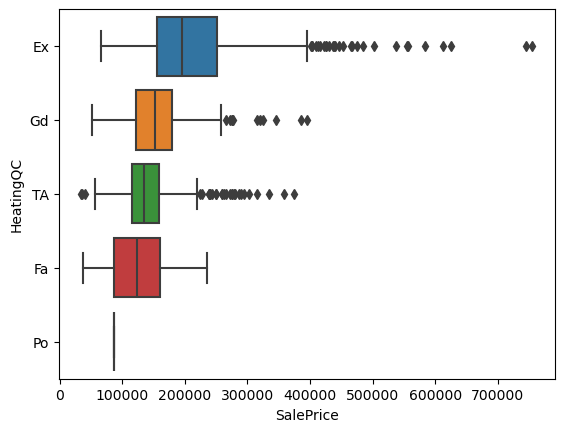

CentralAir


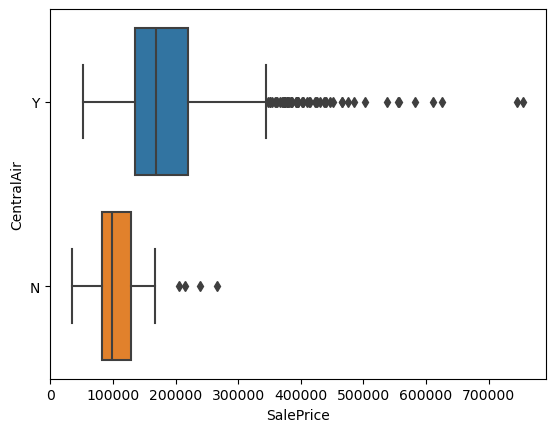

Electrical


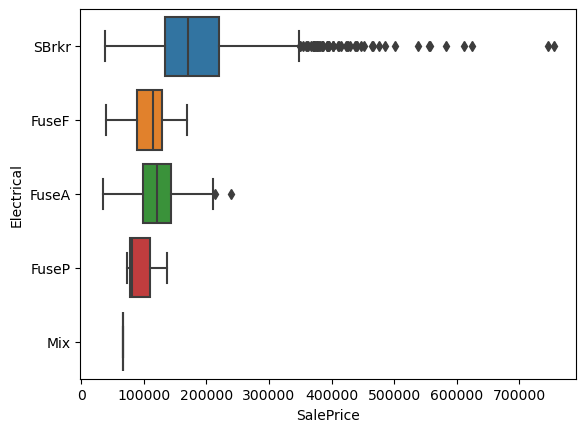

KitchenQual


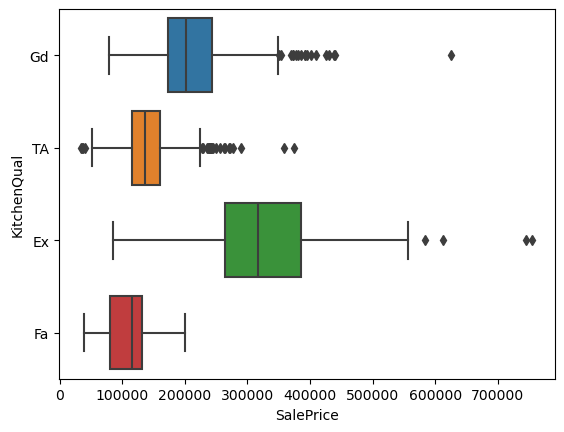

Functional


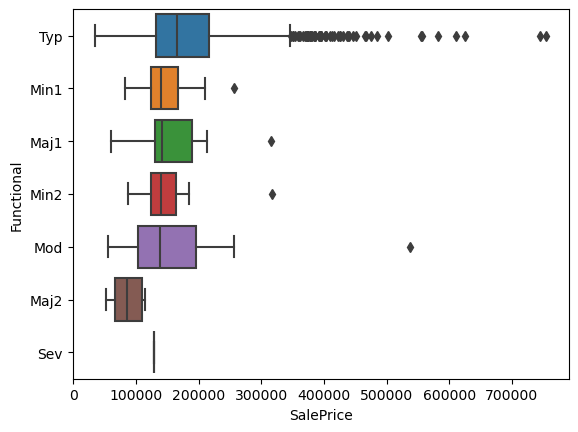

GarageType


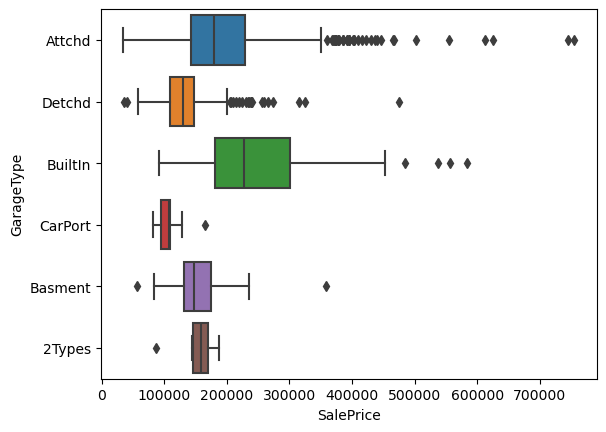

GarageFinish


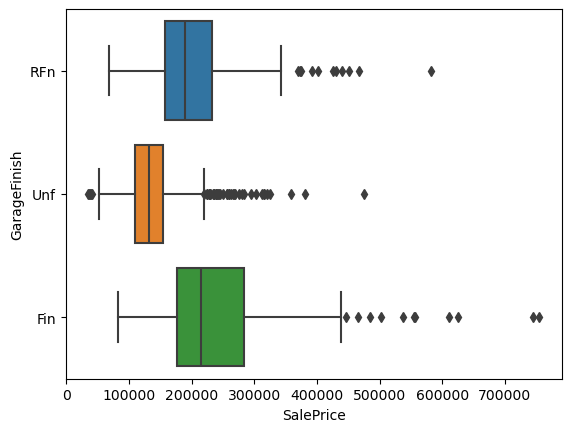

GarageQual


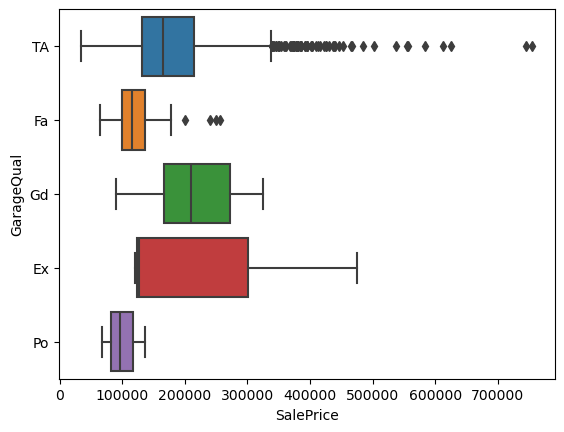

GarageCond


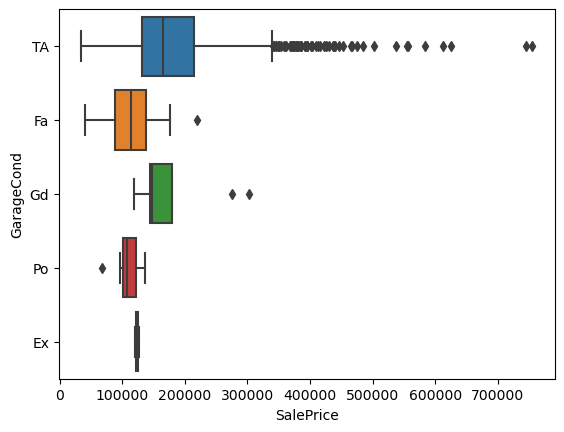

PavedDrive


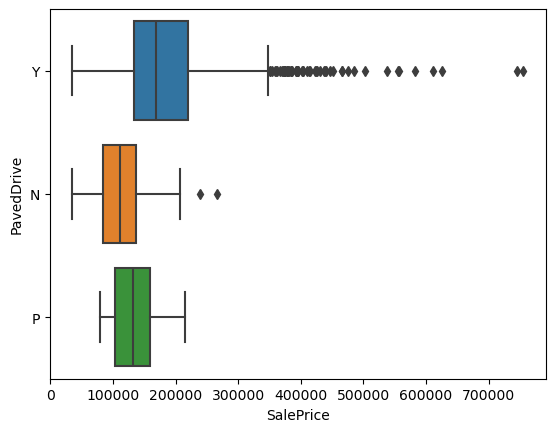

SaleType


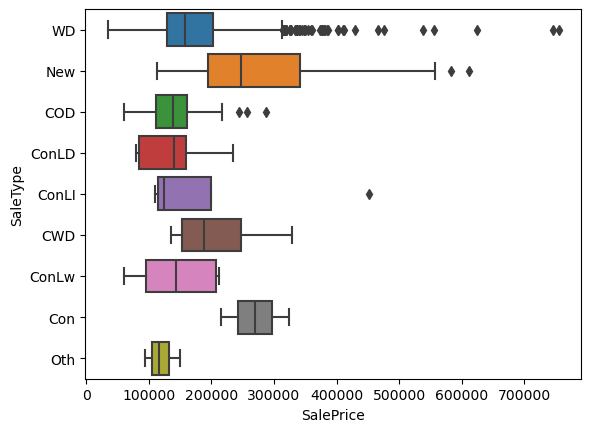

SaleCondition


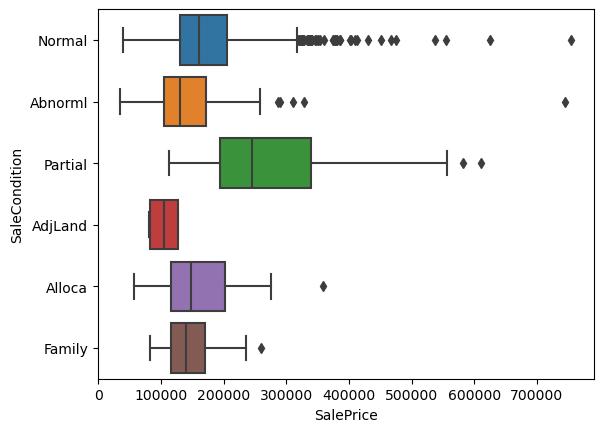

In [32]:
for i in df1.columns:
    if df1[i].dtypes==object:
        sns.boxplot(data=df1,x='SalePrice',y=i)
        print(i)
        show()

### Heatmap for correlation

<Figure size 2500x1500 with 0 Axes>

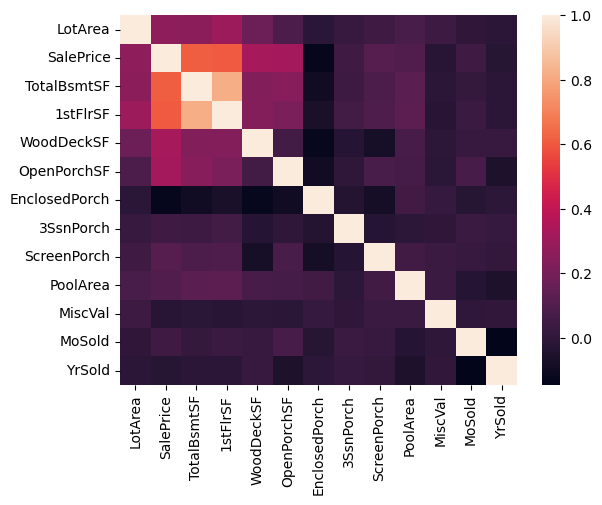

<Figure size 2500x1500 with 0 Axes>

In [33]:
sns.heatmap(df1[['LotArea','SalePrice','TotalBsmtSF','1stFlrSF','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea', 
        'MiscVal','MoSold','YrSold']].corr())
plt.figure(figsize=(25,15))

### Use of pairplot 

In [34]:
#sns.pairplot(data=df1)

### Seperate input and output features

In [35]:
x = df1.drop(labels='SalePrice',axis=1)
y = df1[['SalePrice']]

### Seperating the categorical and numerical features from x

In [36]:
cat=[]
con=[]
for i in x.columns:
    if x[i].dtypes==object:
        cat.append(i)
    else:
        con.append(i)

In [37]:
xcat = x[cat]
xcon = x[con]

In [38]:
xcat.columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive',
       'SaleType', 'SaleCondition'],
      dtype='object')

### Feature Encoding 

In [39]:
from sklearn.preprocessing import LabelEncoder,StandardScaler

In [40]:
le = LabelEncoder()
ss = StandardScaler()

In [41]:
for i in xcat.columns:
    xcat[i]=le.fit_transform(xcat[i])

C:\Users\ANMOL\AppData\Local\Temp\ipykernel_10780\1384516238.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  xcat[i]=le.fit_transform(xcat[i])
C:\Users\ANMOL\AppData\Local\Temp\ipykernel_10780\1384516238.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  xcat[i]=le.fit_transform(xcat[i])
C:\Users\ANMOL\AppData\Local\Temp\ipykernel_10780\1384516238.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

Se

### Feature Scaling

In [42]:
xcon=pd.DataFrame(ss.fit_transform(xcon),columns=con)

### Join xcat and xcon

In [43]:
x = xcon.join(xcat)

### Outliers Treatment and reindexing

In [44]:
out=[]
for i in xcon.columns:
    ol=xcon[(xcon[i]<-3)|(xcon[i]>3)].index
    out.extend(ol)

In [45]:
outliers=list(set(out))

In [46]:
outliers

[1,
 3,
 5,
 7,
 8,
 9,
 17,
 24,
 26,
 28,
 33,
 37,
 39,
 41,
 46,
 48,
 50,
 51,
 52,
 53,
 55,
 58,
 64,
 70,
 72,
 74,
 78,
 80,
 88,
 93,
 102,
 104,
 105,
 113,
 115,
 116,
 118,
 120,
 125,
 129,
 137,
 144,
 153,
 154,
 159,
 161,
 165,
 166,
 169,
 170,
 171,
 176,
 178,
 182,
 185,
 187,
 188,
 189,
 191,
 196,
 197,
 198,
 201,
 205,
 213,
 215,
 218,
 224,
 231,
 233,
 237,
 241,
 245,
 246,
 249,
 250,
 251,
 253,
 258,
 260,
 263,
 267,
 271,
 273,
 277,
 278,
 280,
 289,
 291,
 293,
 297,
 298,
 299,
 300,
 304,
 306,
 309,
 312,
 313,
 314,
 322,
 325,
 326,
 328,
 330,
 332,
 335,
 339,
 342,
 343,
 346,
 349,
 351,
 352,
 355,
 357,
 358,
 359,
 360,
 365,
 366,
 367,
 375,
 378,
 380,
 384,
 398,
 400,
 403,
 406,
 411,
 414,
 420,
 421,
 426,
 440,
 441,
 446,
 451,
 454,
 457,
 459,
 461,
 462,
 470,
 471,
 475,
 477,
 480,
 488,
 493,
 495,
 496,
 499,
 504,
 505,
 508,
 510,
 517,
 519,
 520,
 523,
 529,
 533,
 535,
 539,
 542,
 546,
 548,
 550,
 558,
 570,
 574

In [47]:
x = x.drop(index=outliers,axis=0)
y = y.drop(index=outliers,axis=0)

In [48]:
x.index = range(0,x.shape[0])
y.index = range(0,y.shape[0])

In [49]:
y=le.fit_transform(y)

C:\Users\ANMOL\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### dividing training and testing data

In [50]:
from sklearn.model_selection import train_test_split

In [51]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=21)

### OLS Method

In [52]:
pip install statsmodels

In [53]:
from statsmodels.api import add_constant,OLS
ols=OLS(ytrain,add_constant(xtrain))
model=ols.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     160.6
Date:                Wed, 11 Dec 2024   Prob (F-statistic):               0.00
Time:                        01:30:26   Log-Likelihood:                -4062.2
No. Observations:                 816   AIC:                             8262.
Df Residuals:                     747   BIC:                             8587.
Df Model:                          68                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Id                0.4429      1.334      0.332      0.740      -2.176       3.062
MSSubClass       -5.9967      5.242     -1.144      0.253     -16.288       4.294
LotFrontage       1.3691      2.259      0.606      0.545      -3.065       5.803
LotArea          11.0054      5.331      2.064      0.039       0.540      21.471
OverallQual      22.4291      2.727      8.224      0.000      17.075      27.783
OverallCond      10.9091      2.071      5.268      0.000       6.844      14.975
YearBuilt        25.5083      4.246      6.007      0.000      17.172      33.844
YearRemodAdd      4.9085      2.353      2.086      0.037       0.289       9.529
MasVnrArea       -1.5227      2.146     -0.709      0.478      -5.736       2.691
BsmtFinSF1       11.0043      2.008      5.480      0.000       7.062      14.947
BsmtFinSF2        4.3190      4.630      0.933      0.351      -4.770      13.408
BsmtUnfSF         2.0860      1.677      1.244      0.214      -1.206       5.377
TotalBsmtSF      15.1297      2.654      5.701      0.000       9.920      20.339
1stFlrSF         20.9451      2.840      7.375      0.000      15.370      26.520
2ndFlrSF         24.5981      2.391     10.288      0.000      19.904      29.292
LowQualFinSF    -17.7855     12.924     -1.376      0.169     -43.158       7.587
GrLivArea        34.1975      2.493     13.718      0.000      29.304      39.092
BsmtFullBath      6.0134      2.124      2.831      0.005       1.843      10.184
BsmtHalfBath     22.6709    177.726      0.128      0.899    -326.231     371.573
FullBath          8.9171      2.619      3.405      0.001       3.776      14.058
HalfBath         -0.1841      2.238     -0.082      0.934      -4.577       4.208
BedroomAbvGr     -5.8768      2.508     -2.343      0.019     -10.800      -0.954
KitchenAbvGr     19.8865    155.898      0.128      0.899    -286.163     325.936
TotRmsAbvGrd      1.2286      3.140      0.391      0.696      -4.935       7.392
Fireplaces        6.8160      1.764      3.864      0.000       3.353      10.279
GarageYrBlt      -4.9116      2.791     -1.760      0.079     -10.391       0.568
GarageCars        3.5632      3.461      1.029      0.304      -3.232      10.358
GarageArea       11.4912      3.367      3.413      0.001       4.881      18.102
WoodDeckSF        4.0149      1.697      2.366      0.018       0.684       7.346
OpenPorchSF       2.1710      1.899      1.143      0.253      -1.557       5.899
EnclosedPorch     1.1829      2.153      0.550      0.583      -3.043       5.409
3SsnPorch       -47.9555     48.497     -0.989      0.323    -143.161      47.250
ScreenPorch       4.4816      2.724      1.645      0.100      -0.866       9.829
PoolArea          6.4602     50.644      0.128      0.899     -92.961     105.882
MiscVal          -1.1634      6.899     -0.169   

In [54]:
model.pvalues

Id               7.399399e-01
MSSubClass       2.530156e-01
LotFrontage      5.445996e-01
LotArea          3.932021e-02
OverallQual      8.735432e-16
                     ...     
GarageQual       6.811286e-01
GarageCond       7.572133e-01
PavedDrive       5.053677e-01
SaleType         7.635966e-01
SaleCondition    6.409730e-06
Length: 74, dtype: float64

In [55]:
model.pvalues.sort_values()

GrLivArea       2.330631e-38
2ndFlrSF        2.629091e-23
OverallQual     8.735432e-16
1stFlrSF        4.375049e-13
YearBuilt       2.947002e-09
                    ...     
BsmtHalfBath    8.985306e-01
KitchenAbvGr    8.985306e-01
PoolArea        8.985306e-01
BldgType        9.297214e-01
HalfBath        9.344413e-01
Length: 74, dtype: float64

In [56]:
c=model.pvalues.sort_values().index[-1]
c

'HalfBath'

### Feature Selection by Backward Elimination Method

In [57]:
c=model.pvalues.sort_values().index[-1]

x = x.drop(labels=c,axis=1)

xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=21)
ols=OLS(ytrain,add_constant(xtrain))
model=ols.fit()

score = round(model.rsquared_adj,3)

c=model.pvalues.sort_values().index[-1]
print('next_col_to_drop:',c)
print(score)

next_col_to_drop: BldgType
0.93


In [58]:
c = model.pvalues.sort_values().index[-1]

x = x.drop(labels=c,axis=1)

xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=21)
ols=OLS(ytrain,add_constant(xtrain))
model=ols.fit()

score = round(model.rsquared_adj,3)

c=model.pvalues.sort_values().index[-1]
print('next_col_to_drop:',c)
print(score)

next_col_to_drop: HouseStyle
0.93


In [59]:
c = model.pvalues.sort_values().index[-1]

x = x.drop(labels=c,axis=1)

xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=21)
ols=OLS(ytrain,add_constant(xtrain))
model=ols.fit()

score = round(model.rsquared_adj,3)

c=model.pvalues.sort_values().index[-1]
print('next_col_to_drop:',c)
print(score)

next_col_to_drop: Utilities
0.93


In [60]:
c = model.pvalues.sort_values().index[-1]

x = x.drop(labels=c,axis=1)

xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=21)
ols=OLS(ytrain,add_constant(xtrain))
model=ols.fit()

score = round(model.rsquared_adj,3)

c=model.pvalues.sort_values().index[-1]
print('next_col_to_drop:',c)
print(score)

next_col_to_drop: BsmtHalfBath
0.93


In [61]:
c = model.pvalues.sort_values().index[-1]

x = x.drop(labels=c,axis=1)

xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=21)
ols=OLS(ytrain,add_constant(xtrain))
model=ols.fit()

score = round(model.rsquared_adj,3)

c=model.pvalues.sort_values().index[-1]
print('next_col_to_drop:',c)
print(score)

next_col_to_drop: PoolArea
0.93


In [62]:
c = model.pvalues.sort_values().index[-1]

x = x.drop(labels=c,axis=1)

xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=21)
ols=OLS(ytrain,add_constant(xtrain))
model=ols.fit()

score = round(model.rsquared_adj,3)

c=model.pvalues.sort_values().index[-1]
print('next_col_to_drop:',c)
print(score)

next_col_to_drop: KitchenAbvGr
0.93


In [63]:
c = model.pvalues.sort_values().index[-2]

x = x.drop(labels=c,axis=1)

xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=21)
ols=OLS(ytrain,add_constant(xtrain))
model=ols.fit()

score = round(model.rsquared_adj,3)

c=model.pvalues.sort_values().index[-2]
print('next_col_to_drop:',c)
print(score)

next_col_to_drop: MiscVal
0.931


In [64]:
c = model.pvalues.sort_values().index[-2]

x = x.drop(labels=c,axis=1)

xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=21)
ols=OLS(ytrain,add_constant(xtrain))
model=ols.fit()

score = round(model.rsquared_adj,3)

c=model.pvalues.sort_values().index[-2]
print('next_col_to_drop:',c)
print(score)

next_col_to_drop: Electrical
0.931


In [65]:
c = model.pvalues.sort_values().index[-2]

x = x.drop(labels=c,axis=1)

xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=21)
ols=OLS(ytrain,add_constant(xtrain))
model=ols.fit()

score = round(model.rsquared_adj,3)

c=model.pvalues.sort_values().index[-2]
print('next_col_to_drop:',c)
print(score)

next_col_to_drop: GarageCond
0.931


In [66]:
c = model.pvalues.sort_values().index[-2]

x = x.drop(labels=c,axis=1)

xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=21)
ols=OLS(ytrain,add_constant(xtrain))
model=ols.fit()

score = round(model.rsquared_adj,3)

c=model.pvalues.sort_values().index[-2]
print('next_col_to_drop:',c)
print(score)

next_col_to_drop: SaleType
0.931


In [67]:
c = model.pvalues.sort_values().index[-2]

x = x.drop(labels=c,axis=1)

xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=21)
ols=OLS(ytrain,add_constant(xtrain))
model=ols.fit()

score = round(model.rsquared_adj,3)

c=model.pvalues.sort_values().index[-2]
print('next_col_to_drop:',c)
print(score)

next_col_to_drop: YrSold
0.931


In [68]:
c = model.pvalues.sort_values().index[-2]

x = x.drop(labels=c,axis=1)

xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=21)
ols=OLS(ytrain,add_constant(xtrain))
model=ols.fit()

score = round(model.rsquared_adj,3)

c=model.pvalues.sort_values().index[-2]
print('next_col_to_drop:',c)
print(score)

next_col_to_drop: Id
0.931


In [69]:
c = model.pvalues.sort_values().index[-2]

x = x.drop(labels=c,axis=1)

xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=21)
ols=OLS(ytrain,add_constant(xtrain))
model=ols.fit()

score = round(model.rsquared_adj,3)

c=model.pvalues.sort_values().index[-2]
print('next_col_to_drop:',c)
print(score)

next_col_to_drop: TotRmsAbvGrd
0.931


In [70]:
c = model.pvalues.sort_values().index[-2]

x = x.drop(labels=c,axis=1)

xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=21)
ols=OLS(ytrain,add_constant(xtrain))
model=ols.fit()

score = round(model.rsquared_adj,3)

c=model.pvalues.sort_values().index[-2]
print('next_col_to_drop:',c)
print(score)

next_col_to_drop: GarageFinish
0.931


In [71]:
c = model.pvalues.sort_values().index[-2]

x = x.drop(labels=c,axis=1)

xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=21)
ols=OLS(ytrain,add_constant(xtrain))
model=ols.fit()

score = round(model.rsquared_adj,3)

c=model.pvalues.sort_values().index[-2]
print('next_col_to_drop:',c)
print(score)

next_col_to_drop: BsmtCond
0.931


In [72]:
c = model.pvalues.sort_values().index[-2]

x = x.drop(labels=c,axis=1)

xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=21)
ols=OLS(ytrain,add_constant(xtrain))
model=ols.fit()

score = round(model.rsquared_adj,3)

c=model.pvalues.sort_values().index[-2]
print('next_col_to_drop:',c)
print(score)

next_col_to_drop: EnclosedPorch
0.931


In [73]:
c = model.pvalues.sort_values().index[-2]

x = x.drop(labels=c,axis=1)

xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=21)
ols=OLS(ytrain,add_constant(xtrain))
model=ols.fit()

score = round(model.rsquared_adj,3)

c=model.pvalues.sort_values().index[-2]
print('next_col_to_drop:',c)
print(score)

next_col_to_drop: BsmtFinType2
0.931


In [74]:
c = model.pvalues.sort_values().index[-2]

x = x.drop(labels=c,axis=1)

xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=21)
ols=OLS(ytrain,add_constant(xtrain))
model=ols.fit()

score = round(model.rsquared_adj,3)

c=model.pvalues.sort_values().index[-2]
print('next_col_to_drop:',c)
print(score)

next_col_to_drop: RoofStyle
0.931


In [75]:
c = model.pvalues.sort_values().index[-2]

x = x.drop(labels=c,axis=1)

xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=21)
ols=OLS(ytrain,add_constant(xtrain))
model=ols.fit()

score = round(model.rsquared_adj,3)

c=model.pvalues.sort_values().index[-2]
print('next_col_to_drop:',c)
print(score)

next_col_to_drop: LotFrontage
0.931


In [76]:
c = model.pvalues.sort_values().index[-2]

x = x.drop(labels=c,axis=1)

xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=21)
ols=OLS(ytrain,add_constant(xtrain))
model=ols.fit()

score = round(model.rsquared_adj,3)

c=model.pvalues.sort_values().index[-2]
print('next_col_to_drop:',c)
print(score)

next_col_to_drop: Condition1
0.931


In [77]:
c = model.pvalues.sort_values().index[-2]

x = x.drop(labels=c,axis=1)

xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=21)
ols=OLS(ytrain,add_constant(xtrain))
model=ols.fit()

score = round(model.rsquared_adj,3)

c=model.pvalues.sort_values().index[-2]
print('next_col_to_drop:',c)
print(score)

next_col_to_drop: MoSold
0.932


In [78]:
c = model.pvalues.sort_values().index[-2]

x = x.drop(labels=c,axis=1)

xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=21)
ols=OLS(ytrain,add_constant(xtrain))
model=ols.fit()

score = round(model.rsquared_adj,3)

c=model.pvalues.sort_values().index[-2]
print('next_col_to_drop:',c)
print(score)

next_col_to_drop: Heating
0.932


In [79]:
c = model.pvalues.sort_values().index[-2]

x = x.drop(labels=c,axis=1)

xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=21)
ols=OLS(ytrain,add_constant(xtrain))
model=ols.fit()

score = round(model.rsquared_adj,3)

c=model.pvalues.sort_values().index[-2]
print('next_col_to_drop:',c)
print(score)

next_col_to_drop: BsmtFinType1
0.932


In [80]:
c = model.pvalues.sort_values().index[-2]

x = x.drop(labels=c,axis=1)

xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=21)
ols=OLS(ytrain,add_constant(xtrain))
model=ols.fit()

score = round(model.rsquared_adj,3)

c=model.pvalues.sort_values().index[-2]
print('next_col_to_drop:',c)
print(score)

next_col_to_drop: PavedDrive
0.932


In [81]:
c = model.pvalues.sort_values().index[-2]

x = x.drop(labels=c,axis=1)

xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=21)
ols=OLS(ytrain,add_constant(xtrain))
model=ols.fit()

score = round(model.rsquared_adj,3)

c=model.pvalues.sort_values().index[-2]
print('next_col_to_drop:',c)
print(score)

next_col_to_drop: BsmtFinSF2
0.932


In [82]:
c = model.pvalues.sort_values().index[-2]

x = x.drop(labels=c,axis=1)

xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=21)
ols=OLS(ytrain,add_constant(xtrain))
model=ols.fit()

score = round(model.rsquared_adj,3)

c=model.pvalues.sort_values().index[-2]
print('next_col_to_drop:',c)
print(score)

next_col_to_drop: BsmtUnfSF
0.932


In [83]:
c = model.pvalues.sort_values().index[-2]

x = x.drop(labels=c,axis=1)

xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=21)
ols=OLS(ytrain,add_constant(xtrain))
model=ols.fit()

score = round(model.rsquared_adj,3)

c=model.pvalues.sort_values().index[-2]
print('next_col_to_drop:',c)
print(score)

next_col_to_drop: RoofMatl
0.932


In [84]:
c = model.pvalues.sort_values().index[-2]

x = x.drop(labels=c,axis=1)

xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=21)
ols=OLS(ytrain,add_constant(xtrain))
model=ols.fit()

score = round(model.rsquared_adj,3)

c=model.pvalues.sort_values().index[-2]
print('next_col_to_drop:',c)
print(score)

next_col_to_drop: GarageQual
0.932


In [85]:
c = model.pvalues.sort_values().index[-2]

x = x.drop(labels=c,axis=1)

xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=21)
ols=OLS(ytrain,add_constant(xtrain))
model=ols.fit()

score = round(model.rsquared_adj,3)

c=model.pvalues.sort_values().index[-2]
print('next_col_to_drop:',c)
print(score)

next_col_to_drop: MasVnrArea
0.932


In [86]:
c = model.pvalues.sort_values().index[-2]

x = x.drop(labels=c,axis=1)

xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=21)
ols=OLS(ytrain,add_constant(xtrain))
model=ols.fit()

score = round(model.rsquared_adj,3)

c=model.pvalues.sort_values().index[-2]
print('next_col_to_drop:',c)
print(score)

next_col_to_drop: 3SsnPorch
0.932


In [87]:
c = model.pvalues.sort_values().index[-2]

x = x.drop(labels=c,axis=1)

xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=21)
ols=OLS(ytrain,add_constant(xtrain))
model=ols.fit()

score = round(model.rsquared_adj,3)

c=model.pvalues.sort_values().index[-2]
print('next_col_to_drop:',c)
print(score)

next_col_to_drop: Neighborhood
0.932


In [88]:
c = model.pvalues.sort_values().index[-2]

x = x.drop(labels=c,axis=1)

xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=21)
ols=OLS(ytrain,add_constant(xtrain))
model=ols.fit()

score = round(model.rsquared_adj,3)

c=model.pvalues.sort_values().index[-2]
print('next_col_to_drop:',c)
print(score)

next_col_to_drop: GarageCars
0.932


In [89]:
c = model.pvalues.sort_values().index[-2]

x = x.drop(labels=c,axis=1)

xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=21)
ols=OLS(ytrain,add_constant(xtrain))
model=ols.fit()

score = round(model.rsquared_adj,3)

c=model.pvalues.sort_values().index[-2]
print('next_col_to_drop:',c)
print(score)

next_col_to_drop: OpenPorchSF
0.932


In [90]:
c = model.pvalues.sort_values().index[-2]

x = x.drop(labels=c,axis=1)

xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=21)
ols=OLS(ytrain,add_constant(xtrain))
model=ols.fit()

score = round(model.rsquared_adj,3)

c=model.pvalues.sort_values().index[-2]
print('next_col_to_drop:',c)
print(score)

next_col_to_drop: BsmtExposure
0.932


In [91]:
c = model.pvalues.sort_values().index[-2]

x = x.drop(labels=c,axis=1)

xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=21)
ols=OLS(ytrain,add_constant(xtrain))
model=ols.fit()

score = round(model.rsquared_adj,3)

c=model.pvalues.sort_values().index[-2]
print('next_col_to_drop:',c)
print(score)

next_col_to_drop: ExterCond
0.932


In [92]:
c = model.pvalues.sort_values().index[-2]

x = x.drop(labels=c,axis=1)

xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=21)
ols=OLS(ytrain,add_constant(xtrain))
model=ols.fit()

score = round(model.rsquared_adj,3)

c=model.pvalues.sort_values().index[-2]
print('next_col_to_drop:',c)
print(score)

next_col_to_drop: Condition2
0.932


In [93]:
c = model.pvalues.sort_values().index[-2]

x = x.drop(labels=c,axis=1)

xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=21)
ols=OLS(ytrain,add_constant(xtrain))
model=ols.fit()

score = round(model.rsquared_adj,3)

c=model.pvalues.sort_values().index[-2]
print('next_col_to_drop:',c)
print(score)

next_col_to_drop: LowQualFinSF
0.932


In [94]:
c = model.pvalues.sort_values().index[-2]

x = x.drop(labels=c,axis=1)

xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=21)
ols=OLS(ytrain,add_constant(xtrain))
model=ols.fit()

score = round(model.rsquared_adj,3)

c=model.pvalues.sort_values().index[-2]
print('next_col_to_drop:',c)
print(score)

next_col_to_drop: LandContour
0.932


In [95]:
c = model.pvalues.sort_values().index[-2]

x = x.drop(labels=c,axis=1)

xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=21)
ols=OLS(ytrain,add_constant(xtrain))
model=ols.fit()

score = round(model.rsquared_adj,3)

c=model.pvalues.sort_values().index[-2]
print('next_col_to_drop:',c)
print(score)

next_col_to_drop: ScreenPorch
0.932


In [96]:
c = model.pvalues.sort_values().index[-2]

x = x.drop(labels=c,axis=1)

xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=21)
ols=OLS(ytrain,add_constant(xtrain))
model=ols.fit()

score = round(model.rsquared_adj,3)

c=model.pvalues.sort_values().index[-2]
print('next_col_to_drop:',c)
print(score)

next_col_to_drop: 1stFlrSF
0.932


In [97]:
xtrain.columns

Index(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'GrLivArea', 'BsmtFullBath', 'FullBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'Fireplaces', 'GarageYrBlt', 'GarageArea', 'WoodDeckSF', 'MSZoning',
       'Street', 'LotShape', 'LandSlope', 'Exterior1st', 'Exterior2nd',
       'ExterQual', 'Foundation', 'BsmtQual', 'HeatingQC', 'CentralAir',
       'KitchenQual', 'Functional', 'GarageType', 'SaleCondition'],
      dtype='object')

### Applying all algorithms to check the best score

In [98]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor

In [99]:
lr=LinearRegression()
dtr=DecisionTreeRegressor(criterion='absolute_error')
rfr=RandomForestRegressor(n_estimators=5)
adb=AdaBoostRegressor(lr,n_estimators=3)
knn=KNeighborsRegressor(n_neighbors=3)

In [100]:
from sklearn.metrics import r2_score

In [101]:
d=[lr,dtr,rfr,adb,knn]
for i in d:
    model=i.fit(xtrain,ytrain)
    tr_pred=model.predict(xtrain)
    tr_scr=r2_score(tr_pred,ytrain)
    ts_pred=model.predict(xtest)
    ts_scr=r2_score(ts_pred,ytest)
    print('algorithm',i)
    print('tr_scr',tr_scr)
    print('ts_scr',ts_scr)
    print('********************************************')

algorithm LinearRegression()
tr_scr 0.9296809468269978
ts_scr 0.8847652717102826
********************************************
algorithm DecisionTreeRegressor(criterion='absolute_error')
tr_scr 0.9999633881955449
ts_scr 0.747277812553051
********************************************
algorithm RandomForestRegressor(n_estimators=5)
tr_scr 0.9722338459063892
ts_scr 0.8019726948523234
********************************************
algorithm AdaBoostRegressor(estimator=LinearRegression(), n_estimators=3)
tr_scr 0.9287424534541623
ts_scr 0.8843787322197382
********************************************
algorithm KNeighborsRegressor(n_neighbors=3)
tr_scr 0.9132800141893718
ts_scr 0.7715887481506254
********************************************


### Predicting training and testing scores using Linear Regression

In [102]:
from sklearn.metrics import r2_score

In [103]:
model=lr.fit(xtrain,ytrain)
tr_pred=model.predict(xtrain)
tr_scr=r2_score(tr_pred,ytrain)
ts_pred=model.predict(xtest)
ts_scr=r2_score(ts_pred,ytest)
print('tr_scr',tr_scr)
print('ts_scr',ts_scr)

tr_scr 0.9296809468269978
ts_scr 0.8847652717102826


### The model is not as such overfit because the difference between tr_scr and ts_scr is significantly less.
### Still I have applied ridge/lasso to check whether it increases my ts_scr or not.

### Regularisation using Lasso

In [104]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score

### First predicting using a small alpha value 

In [105]:
la = Lasso(alpha=0.1)  
la.fit(xtrain, ytrain)
tr_pred = la.predict(xtrain)
ts_pred = la.predict(xtest)

### Mean Squared Error

In [106]:
tr_err = mean_squared_error(ytrain, tr_pred)
ts_err = mean_squared_error(ytest, ts_pred)

print("Training error:", tr_err)
print("Testing Error:", ts_err)

Training error: 1282.33878449904
Testing Error: 1837.6509772042602


### r2_score

In [107]:
tr_scr2 = r2_score(ytrain, tr_pred)
ts_scr2 = r2_score(ytest, ts_pred)

print("Training score:", tr_scr2)
print("Testing score:", ts_scr2)

Training score: 0.9334917244883478
Testing score: 0.8991449034543393


### Applying Grid Search CV to tune the parameters to get the best alpha value

In [108]:
from sklearn.model_selection import GridSearchCV
import numpy as np

alp_val = np.arange(0.01, 1.01, 0.01) 
pr_grid = {'alpha': alp_val}
la = Lasso()

grid_search = GridSearchCV(la, pr_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(xtrain, ytrain)

best_alpha = grid_search.best_params_['alpha']
best_model = grid_search.best_estimator_

print("Best alpha:", best_alpha)

C:\Users\ANMOL\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.359e+04, tolerance: 1.255e+03
  model = cd_fast.enet_coordinate_descent(
C:\Users\ANMOL\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.738e+04, tolerance: 1.262e+03
  model = cd_fast.enet_coordinate_descent(
C:\Users\ANMOL\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.201e+03, toleranc

Best alpha: 0.54


### Best alpha value got is 0.54

### Incorporating the best alpha value and checking the score again

In [109]:
la = Lasso(alpha=0.54)  
la.fit(xtrain, ytrain)
tr_pred = la.predict(xtrain)
ts_pred = la.predict(xtest)

### r2_score

In [110]:
tr_scr2 = r2_score(ytrain, tr_pred)
ts_scr2 = r2_score(ytest, ts_pred)

print("Training score:", tr_scr2)
print("Testing score:", ts_scr2)

Training score: 0.931478890306294
Testing score: 0.8975009352659858


### By applying lasso also there is no significant change in the scores as such only a slight better performance which indicates that the model is as such performing better

### Loading the new test dataset

In [111]:
df2=pd.read_csv("D:/ML PROJECT/testing_set.csv")

In [112]:
df2

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0     1461          20       RH         80.0    11622   Pave   NaN      Reg   
1     1462          20       RL         81.0    14267   Pave   NaN      IR1   
2     1463          60       RL         74.0    13830   Pave   NaN      IR1   
3     1464          60       RL         78.0     9978   Pave   NaN      IR1   
4     1465         120       RL         43.0     5005   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1454  2915         160       RM         21.0     1936   Pave   NaN      Reg   
1455  2916         160       RM         21.0     1894   Pave   NaN      Reg   
1456  2917          20       RL        160.0    20000   Pave   NaN      Reg   
1457  2918          85       RL         62.0    10441   Pave   NaN      Reg   
1458  2919          60       RL         74.0     9627   Pave   NaN      Reg   

     LandContour Utilities  ... ScreenPorch PoolArea PoolQC  Fence  \
0            Lvl    AllPub  ...         120        0    NaN  MnPrv   
1            Lvl    AllPub  ...           0        0    NaN    NaN   
2            Lvl    AllPub  ...           0        0    NaN  MnPrv   
3            Lvl    AllPub  ...           0        0    NaN    NaN   
4            HLS    AllPub  ...         144        0    NaN    NaN   
...          ...       ...  ...         ...      ...    ...    ...   
1454         Lvl    AllPub  ...           0        0    NaN    NaN   
1455         Lvl    AllPub  ...           0        0    NaN    NaN   
1456         Lvl    AllPub  ...           0        0    NaN    NaN   
1457         Lvl    AllPub  ...           0        0    NaN  MnPrv   
1458         Lvl    AllPub  ...           0        0    NaN    NaN   

     MiscFeature MiscVal MoSold  YrSold  SaleType  SaleCondition  
0            NaN       0      6    2010        WD         Normal  
1           Gar2   12500      6    2010        WD         Normal  
2            NaN       0      3    2010        WD         Normal  
3            NaN       0      6    2010        WD         Normal  
4            NaN       0      1    2010        WD         Normal  
...          ...     ...    ...     ...       ...            ...  
1454         NaN       0      6    2006        WD         Normal  
1455         NaN       0      4    2006        WD        Abnorml  
1456         NaN       0      9    2006        WD        Abnorml  
1457        Shed     700      7    2006        WD         Normal  
1458         NaN       0     11    2006        WD         Normal  

[1459 rows x 80 columns]

### checking the null values in the test dataset

In [113]:
df2.isna().sum()

Id                 0
MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 80, dtype: int64

### filling null values in new test dataset

In [114]:
for i in df2.columns:
    if df2[i].dtypes==object:
        df2[i]=df2[i].fillna(df2[i].mode()[0])
    else:
        df2[i]=df2[i].fillna(df2[i].mean())

### Sorting and choosing the desired features from the train dataset into test dataset

In [115]:
nw=[]   
for i in x.columns: 
    if i in df2.columns:
        nw.append(i)

In [116]:
df3=df2[nw]

In [117]:
df3.columns

Index(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'GrLivArea', 'BsmtFullBath', 'FullBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'Fireplaces', 'GarageYrBlt', 'GarageArea', 'WoodDeckSF', 'MSZoning',
       'Street', 'LotShape', 'LandSlope', 'Exterior1st', 'Exterior2nd',
       'ExterQual', 'Foundation', 'BsmtQual', 'HeatingQC', 'CentralAir',
       'KitchenQual', 'Functional', 'GarageType', 'SaleCondition'],
      dtype='object')

In [118]:
cat1=[]
con1=[]
for i in df3.columns:
    if df3[i].dtypes==object:
        cat1.append(i)
    else:
        con1.append(i)

In [119]:
xcat1=df3[cat1]
xcon1=df3[con1]

In [120]:
for i in xcat1.columns:
    xcat1[i]=le.fit_transform(xcat1[i])

C:\Users\ANMOL\AppData\Local\Temp\ipykernel_10780\1456167608.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  xcat1[i]=le.fit_transform(xcat1[i])
C:\Users\ANMOL\AppData\Local\Temp\ipykernel_10780\1456167608.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  xcat1[i]=le.fit_transform(xcat1[i])
C:\Users\ANMOL\AppData\Local\Temp\ipykernel_10780\1456167608.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [121]:
xcon1=pd.DataFrame(ss.fit_transform(xcon1),columns=con1)

In [122]:
x1=xcon1.join(xcat1)

### Predictions using new test dataset

In [123]:
model.predict(x1)

array([163.4805683 , 226.77634529, 298.68642455, ..., 234.99459393,
       128.81252639, 377.48136748])

In [124]:
x1['SalePrice']=model.predict(x1)

In [125]:
x1.head(20)

MSSubClass   LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
0    -0.874711  0.363929    -0.751101     0.400766  -0.340945     -1.072885   
1    -0.874711  0.897861    -0.054877     0.400766  -0.439695     -1.214908   
2     0.061351  0.809646    -0.751101    -0.497418   0.844059      0.678742   
3     0.061351  0.032064    -0.054877     0.400766   0.876976      0.678742   
4     1.465443 -0.971808     1.337571    -0.497418   0.679475      0.394694   
5     0.061351  0.036505    -0.054877    -0.497418   0.712392      0.489377   
6    -0.874711 -0.371261    -0.054877     1.298950   0.679475      1.104813   
7     0.061351 -0.286074    -0.054877    -0.497418   0.876976      0.678742   
8    -0.874711  0.072033     0.641347    -0.497418   0.613642      0.300012   
9    -0.874711 -0.286478    -1.447325    -0.497418  -0.044694     -0.646813   
10    1.465443 -0.799618     0.641347    -0.497418   0.909893      0.726083   
11    2.401505 -1.643007    -0.054877    -0.497418  -0.011777     -0.599472   
12    2.401505 -1.643007    -0.751101    -0.497418  -0.011777     -0.599472   
13    2.401505 -1.521889    -0.054877     0.400766   0.119890     -0.410107   
14    1.465443 -1.521889     0.641347     0.400766   0.119890     -0.410107   
15    0.061351  0.613434     2.033795    -0.497418   1.239060      1.246837   
16   -0.874711  0.618480     1.337571    -0.497418   1.239060      1.246837   
17   -0.874711  0.343339     2.033795    -0.497418   1.107393      1.010131   
18   -0.874711  0.868590     1.337571    -0.497418   1.107393      1.057472   
19   -0.874711  0.904522     2.033795    -0.497418   1.041560      0.962789   

    BsmtFinSF1  TotalBsmtSF  1stFlrSF  2ndFlrSF  ...  ExterQual  Foundation  \
0     0.063295    -0.370808 -0.654561 -0.775254  ...          3           1   
1     1.063392     0.639144  0.433298 -0.775254  ...          3           1   
2     0.773254    -0.266876 -0.574165  0.891944  ...          3           2   
3     0.357829    -0.271395 -0.579190  0.837243  ...          3           2   
4    -0.387298     0.528434  0.310192 -0.775254  ...          2           2   
5    -0.965376    -0.639677 -0.988708  1.346202  ...          3           2   
6     1.089768     0.275381  0.076541 -0.775254  ...          3           2   
7    -0.965376    -0.580933 -0.923386  0.832486  ...          3           2   
8     0.434759     0.573622  0.463447 -0.775254  ...          3           2   
9     0.801828    -0.370808 -0.689735 -0.775254  ...          3           1   
10    1.344738     0.810859  0.453397 -0.775254  ...          2           2   
11   -0.622486    -1.272310 -1.692173  0.423416  ...          3           1   
12   -0.305972    -1.177415 -1.586653  0.573250  ...          3           1   
13    0.164403    -0.431812 -0.757569  0.654113  ...          3           1   
14   -0.965376    -0.474741 -0.805304 -0.775254  ...          3           1   
15   -0.965376     1.228848  1.181987  0.906214  ...          0           2   
16   -0.965376     1.124916  0.973459 -0.775254  ...          2           2   
17   -0.723595     1.472864  1.360365 -0.775254  ...          2           2   
18   -0.903832     1.753030  1.671900 -0.775254  ...          2           2   
19    2.052499     4.066657  3.867718 -0.775254  ...          0           2   

    BsmtQual  HeatingQC  CentralAir  KitchenQual  Functional  GarageType  \
0          3          4           1            3           6           1   
1          3          4           1            2           6           1   
2          2          2           1            3           6           1   
3          3          0           1            2           6           1   
4          2          0           1            2           6           1   
5          2          2           1            3           6           1   
6          2          0           1            3           6           1   
7          2          2           1            3           6           1   


In [126]:
x1['Id']=df['Id']

In [127]:
result=x1[['Id','SalePrice']]

In [128]:
result.head(20)

Id   SalePrice
0    1  163.480568
1    2  226.776345
2    3  298.686425
3    4  324.692454
4    5  272.989018
5    6  280.742070
6    7  285.715347
7    8  256.097438
8    9  284.079874
9   10  131.777330
10  11  329.760437
11  12   72.543269
12  13   54.586434
13  14  197.989893
14  15  116.421439
15  16  526.207449
16  17  379.934804
17  18  425.575665
18  19  425.348552
19  20  651.011423